# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import datetime
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv("../../Data/paths_IP_v4.csv") 
data = data.sort_values(['id']).reset_index(drop=True)

## Part 0. Data Preparation

### a. Data checking

In [3]:
pd.set_option('display.max_columns', len(data))
print(data.shape)
data.head()

(118907, 705)


,id,client_id,case_number,assign_id,new,new_3,as_recnum,as_date_opened,as_date_closed,as_date_prev,as_date_next,as_length_IP,as_gap_between_IP,as_pop,as_loc,as_unit,as_subunit,as_name,as_close,svc_pre_all,svc_pre,svc_pre_sub,svc_during,svc_post_sub,svc_post,svc_post_all,svc_op_7days_pre,svc_op_30days_pre,svc_op_60days_pre,svc_op_90days_pre,svc_es_7days_pre,svc_es_30days_pre,svc_es_60days_pre,svc_es_90days_pre,svc_ip_7days_pre,svc_ip_30days_pre,svc_ip_60days_pre,svc_ip_90days_pre,svc_24h_7days_pre,svc_24h_30days_pre,svc_24h_60days_pre,svc_24h_90days_pre,svc_dt_7days_pre,svc_dt_30days_pre,svc_dt_60days_pre,svc_dt_90days_pre,svc_op_7days_postdc,svc_op_30days_postdc,svc_op_60days_postdc,svc_op_90days_postdc,svc_es_7days_postdc,svc_es_30days_postdc,svc_es_60days_postdc,svc_es_90days_postdc,svc_ip_7days_postdc,svc_ip_30days_postdc,svc_ip_60days_postdc,svc_ip_90days_postdc,svc_24h_7days_postdc,svc_24h_30days_postdc,svc_24h_60days_postdc,svc_24h_90days_postdc,svc_dt_7days_postdc,svc_dt_30days_postdc,svc_dt_60days_postdc,svc_dt_90days_postdc,loc_pre_7days_ACT,loc_pre_30days_ACT,loc_pre_60days_ACT,loc_pre_90days_ACT,loc_pre_7days_CM,loc_pre_30days_CM,loc_pre_60days_CM,loc_pre_90days_CM,loc_pre_7days_CMINST,loc_pre_30days_CMINST,loc_pre_60days_CMINST,loc_pre_90days_CMINST,loc_pre_7days_CMSTR,loc_pre_30days_CMSTR,loc_pre_60days_CMSTR,loc_pre_90days_CMSTR,loc_pre_7days_CMTRAN,loc_pre_30days_CMTRAN,loc_pre_60days_CMTRAN,loc_pre_90days_CMTRAN,loc_pre_7days_WRAP,loc_pre_30days_WRAP,loc_pre_60days_WRAP,loc_pre_90days_WRAP,loc_pre_7days_TBS,loc_pre_30days_TBS,loc_pre_60days_TBS,loc_pre_90days_TBS,loc_pre_7days_FFS,loc_pre_30days_FFS,loc_pre_60days_FFS,loc_pre_90days_FFS,loc_pre_7days_OP,loc_pre_30days_OP,loc_pre_60days_OP,loc_pre_90days_OP,loc_pre_7days_OPLIHP,loc_pre_30days_OPLIHP,loc_pre_60days_OPLIHP,loc_pre_90days_OPLIHP,loc_pre_7days_OPR,loc_pre_30days_OPR,loc_pre_60days_OPR,loc_pre_90days_OPR,loc_pre_7days_PREV,loc_pre_30days_PREV,loc_pre_60days_PREV,loc_pre_90days_PREV,loc_pre_7days_CO,loc_pre_30days_CO,loc_pre_60days_CO,loc_pre_90days_CO,loc_pre_7days_CR,loc_pre_30days_CR,loc_pre_60days_CR,loc_pre_90days_CR,loc_pre_7days_CS,loc_pre_30days_CS,loc_pre_60days_CS,loc_pre_90days_CS,loc_pre_7days_ESU,loc_pre_30days_ESU,loc_pre_60days_ESU,loc_pre_90days_ESU,loc_pre_7days_PERT,loc_pre_30days_PERT,loc_pre_60days_PERT,loc_pre_90days_PERT,loc_pre_7days_UO,loc_pre_30days_UO,loc_pre_60days_UO,loc_pre_90days_UO,loc_pre_7days_IP,loc_pre_30days_IP,loc_pre_60days_IP,loc_pre_90days_IP,loc_pre_7days_IPCAPS,loc_pre_30days_IPCAPS,loc_pre_60days_IPCAPS,loc_pre_90days_IPCAPS,loc_pre_7days_IPCNTY,loc_pre_30days_IPCNTY,loc_pre_60days_IPCNTY,loc_pre_90days_IPCNTY,loc_pre_7days_IPFFS,loc_pre_30days_IPFFS,loc_pre_60days_IPFFS,loc_pre_90days_IPFFS,loc_pre_7days_IPLIHP,loc_pre_30days_IPLIHP,loc_pre_60days_IPLIHP,loc_pre_90days_IPLIHP,loc_pre_7days_IPST,loc_pre_30days_IPST,loc_pre_60days_IPST,loc_pre_90days_IPST,loc_pre_7days_JAIL,loc_pre_30days_JAIL,loc_pre_60days_JAIL,loc_pre_90days_JAIL,loc_pre_7days_JFS,loc_pre_30days_JFS,loc_pre_60days_JFS,loc_pre_90days_JFS,loc_pre_7days_EDG,loc_pre_30days_EDG,loc_pre_60days_EDG,loc_pre_90days_EDG,loc_pre_7days_LTC,loc_pre_30days_LTC,loc_pre_60days_LTC,loc_pre_90days_LTC,loc_pre_7days_LTCINST,loc_pre_30days_LTCINST,loc_pre_60days_LTCINST,loc_pre_90days_LTCINST,loc_pre_7days_LTCRES,loc_pre_30days_LTCRES,loc_pre_60days_LTCRES,loc_pre_90days_LTCRES,loc_pre_7days_RES,loc_pre_30days_RES,loc_pre_60days_RES,loc_pre_90days_RES,loc_pre_7days_BHC,loc_pre_30days_BHC,loc_pre_60days_BHC,loc_pre_90days_BHC,loc_pre_7days_DTC,loc_pre_30days_DTC,loc_pre_60days_DTC,loc_pre_90days_DTC,loc_pre_7days_DTCTF,loc_pre_30days_DTCTF,loc_pre_60days_DTCTF,loc_pre_90days_DTCTF,loc_pre_7days_DTR,loc_pre_30days_DTR,loc_pre_60days_DTR,loc_pre_90days_DTR,loc_pre_7days_STRTP,loc_pre_30days_STRTP,loc_pre_60days_STRTP,loc_pre_90days_STRTP,loc_post_7days_ACT,loc_post_30days_ACT,loc_post_60days_ACT,loc_post_90days_ACT,loc_post_7days_CM,loc_post_30days_CM,loc_post_60

In [4]:
# Check overall data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118907 entries, 0 to 118906
Columns: 705 entries, id to mar
dtypes: float64(56), int64(491), object(158)
memory usage: 639.6+ MB


In [5]:
data.groupby(['as_pop'])['as_pop'].count()

as_pop
A    104933
C     13974
Name: as_pop, dtype: int64

In [6]:


data_CYF = data.query('as_pop == "C"')
pop_group_CYF_dist = data_CYF[['client_id','as_pop']].groupby('client_id').max().as_pop.value_counts()
print(pop_group_CYF_dist)

data_AOA = data.query('as_pop == "A"')
pop_group_AOA_dist = data_AOA[['client_id','as_pop']].groupby('client_id').max().as_pop.value_counts()
print(pop_group_AOA_dist)

C    6333
Name: as_pop, dtype: int64
A    38278
Name: as_pop, dtype: int64


In [7]:
# Check data type
var_name = list(data.columns.values)
type_name = list(data.dtypes)
var_list = pd.DataFrame(
    {'variable_name': var_name,
     'data_type': type_name
    })

In [8]:
pd.set_option('display.max_rows', None)
print(var_list)

                   variable_name data_type
0                             id     int64
1                      client_id     int64
2                    case_number     int64
3                      assign_id     int64
4                            new     int64
5                          new_3     int64
6                      as_recnum     int64
7                 as_date_opened    object
8                 as_date_closed    object
9                   as_date_prev    object
10                  as_date_next    object
11                  as_length_IP     int64
12             as_gap_between_IP   float64
13                        as_pop    object
14                        as_loc    object
15                       as_unit     int64
16                    as_subunit     int64
17                       as_name    object
18                      as_close    object
19                   svc_pre_all     int64
20                       svc_pre     int64
21                   svc_pre_sub     int64
22         

In [9]:
# Convert date column to date type
date_cols = ['as_date_opened', 'as_date_closed', 'as_date_next', 'as_date_prev']
for i in date_cols:
    data[i] = pd.to_datetime(data[i])

In [10]:
# Rename some variables
data.rename(columns = {"sub": "substance",
                     "ins":"insurance"},
                                 inplace = True)

In [11]:
# Change some columns to category data type
cols = ['as_pop', 'as_loc', 'as_close',
       'age_group','gender','race','lang','dx_group', 'co', 'substance','insurance','educ', 'emp','liv','sexorient','justice','dv','trauma','regional','vet','mar']
data[cols] = data[cols].astype('category')

In [12]:
# Check the data type again
var_name = list(data.columns.values)
type_name = list(data.dtypes)
var_list = pd.DataFrame(
    {'variable_name': var_name,
     'data_type': type_name
    })
pd.set_option('display.max_rows', None)
print(var_list)

                   variable_name       data_type
0                             id           int64
1                      client_id           int64
2                    case_number           int64
3                      assign_id           int64
4                            new           int64
5                          new_3           int64
6                      as_recnum           int64
7                 as_date_opened  datetime64[ns]
8                 as_date_closed  datetime64[ns]
9                   as_date_prev  datetime64[ns]
10                  as_date_next  datetime64[ns]
11                  as_length_IP           int64
12             as_gap_between_IP         float64
13                        as_pop        category
14                        as_loc        category
15                       as_unit           int64
16                    as_subunit           int64
17                       as_name          object
18                      as_close        category
19                  

### b. Data Wrangling

In [13]:
# Correct the as_gap_between_IP column (if it is negative, convert it to 0)
data['as_gap_between_IP'] = data.as_gap_between_IP.clip(lower=0)

In [14]:
# Create the gap between index IP and former IP
data['as_gap_since_former_IP'] = data.as_date_opened - data.as_date_prev
data['as_gap_since_former_IP']=data['as_gap_since_former_IP']/np.timedelta64(1,'D')

In [15]:
# hospitalization history (how many IPs before the current IP index)
data = data.sort_values(by='id')
data['IP_history'] = data.groupby('client_id')['assign_id'].rank(method="first", ascending=True)
data['IP_history'] = data['IP_history'] - 1

In [16]:
# Create function for fiscal year column
def unix_stamp(date):
    return  datetime.datetime.strptime(date,"%Y/%m/%d")

def unix_stamp2(date):
    return  datetime.datetime.strptime(date,"%Y-%m-%d %H:%M:%S")

def fiscal_year(x):
    if unix_stamp('2008/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2009/06/30'):
        return 'FY 2008-2009'
    elif unix_stamp('2009/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2010/06/30'):
        return 'FY 2009-2010'
    elif unix_stamp('2010/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2011/06/30'):
        return 'FY 2010-2011'
    elif unix_stamp('2011/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2012/06/30'):
        return 'FY 2011-2012'
    elif unix_stamp('2012/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2013/06/30'):
        return 'FY 2012-2013'
    elif unix_stamp('2013/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2014/06/30'):
        return 'FY 2013-2014'
    elif unix_stamp('2014/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2015/06/30'):
        return 'FY 2014-2015'
    elif unix_stamp('2015/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2016/06/30'):
        return 'FY 2015-2016'
    elif unix_stamp('2016/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2017/06/30'):
        return 'FY 2016-2017'
    elif unix_stamp('2017/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2018/06/30'):
        return 'FY 2017-2018'
    elif unix_stamp('2018/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2019/06/30'):
        return 'FY 2018-2019'
    elif unix_stamp('2019/07/01') <= unix_stamp2(str(x)) <= unix_stamp('2020/06/30'):
        return 'FY 2019-2020'
    else:
        return 'fail'



In [17]:
# Create fiscal year column

data['fiscal_year'] = data['as_date_opened'].apply(fiscal_year)

In [18]:
# Excluding cases that have date_opened before FY2008-2009
data = data.query('fiscal_year != "fail"') 

In [19]:
# Check how many missing data in each variable
data.isnull().sum()/len(data)*100

id                               0.000000
client_id                        0.000000
case_number                      0.000000
assign_id                        0.000000
new                              0.000000
new_3                            0.000000
as_recnum                        0.000000
as_date_opened                   0.000000
as_date_closed                   0.000000
as_date_prev                    36.728823
as_date_next                    36.735552
as_length_IP                     0.000000
as_gap_between_IP               36.735552
as_pop                           0.000000
as_loc                           0.000000
as_unit                          0.000000
as_subunit                       0.000000
as_name                          0.000000
as_close                         0.000000
svc_pre_all                      0.000000
svc_pre                          0.000000
svc_pre_sub                      0.000000
svc_during                       0.000000
svc_post_sub                     0

In [20]:
print('Number of distinct case: ', data.shape[0])
total_case = data.groupby(['as_pop'])['as_pop'].count()
print(total_case)

Number of distinct case:  118893
as_pop
A    104920
C     13973
Name: as_pop, dtype: int64


In [21]:
# Select only CYF data
#data = data.query('as_pop == "C"')
#pop_group_dist = data[['client_id','as_pop']].groupby('client_id').max().as_pop.value_counts()
#print(pop_group_dist)
#data.to_csv (r'paths_CYF_Data.csv', index = False, header=True)

In [22]:
# Select only AOA data
data = data.query('as_pop == "A"')

In [23]:
pop_group_dist = data[['client_id','as_pop']].groupby('client_id').max().as_pop.value_counts()
print(pop_group_dist)

A    38272
Name: as_pop, dtype: int64


In [24]:
# Recode some variables
# recode age group
data['age_group'] = data['age_group'].replace(['Age 0-5','Age 6-11','Age 12-15','Age 16-17','Age 18-25'],'Age <18-25')

# recode gender
data['gender'] = data['gender'].replace(['Other/Unknwon','Another Gender Identity','Transgender','Decline to state','Questioning/Unsure','Genderqueer'],'Other/Unknown')

# recode language
data['lang'] = data['lang'].replace(['Other Asian','Vietnamese', 'Tagalog'],'Asian languages')
data['lang'] = data['lang'].replace(['Arabic','Farsi', 'Other Middle Eastern'],'Middle Eastern languages')
#data['lang'].fillna("Other/Unknown", inplace = True)

# recode race
data['race'] = data['race'].replace([' '],'Unknown')

# recode insurance
data['insurance'] = data['insurance'].replace(['Medicare Only','Medi-Cal Only'],'Medi-Cal + Medicare')

# Make invalid to null and group Other + Excluded
data['dx_group'] = data['dx_group'].replace('Invalid', np.NaN)
data['dx_group'] = data['dx_group'].replace(['Other','Excluded'],'Other/ Excluded')

# Recode sexual orientation
data['sexorient'] = data['sexorient'].replace(['Bisexual','Gay Male','Transgender','Lesbian', 'Other','Questioning', 'Transgender'],'LGBTQ+')
data['sexorient'] = data['sexorient'].replace(['Decline to State','Deferred','Missing'],'Missing/Not Reported')


## Part 1 - Demographics

FY 2019-2020    5302
FY 2018-2019    3953
FY 2017-2018    3648
FY 2015-2016    3565
FY 2016-2017    3260
FY 2014-2015    3244
FY 2013-2014    3153
FY 2012-2013    2883
FY 2011-2012    2653
FY 2010-2011    2503
FY 2009-2010    2451
FY 2008-2009    1657
Name: fiscal_year, dtype: int64
FY 2019-2020    13.853470
FY 2018-2019    10.328700
FY 2017-2018     9.531773
FY 2015-2016     9.314904
FY 2016-2017     8.517977
FY 2014-2015     8.476171
FY 2013-2014     8.238399
FY 2012-2013     7.532922
FY 2011-2012     6.931961
FY 2010-2011     6.540029
FY 2009-2010     6.404160
FY 2008-2009     4.329536
Name: fiscal_year, dtype: float64


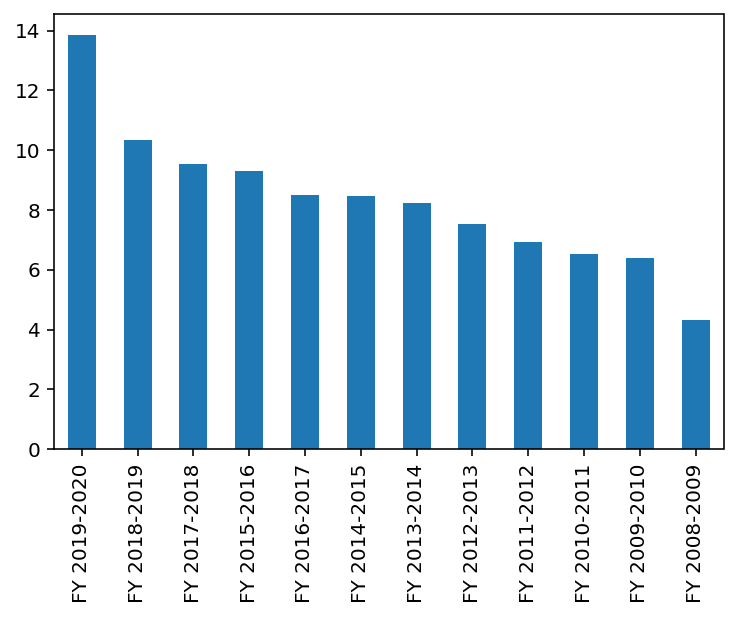

In [328]:
# fiscal year distribution
FY_dist = data[['client_id','fiscal_year']].groupby('client_id').max().fiscal_year.value_counts()
FY_dist_perc = data[['client_id','fiscal_year']].groupby('client_id').max().fiscal_year.value_counts(normalize=True) * 100
print(FY_dist)
print(FY_dist_perc)
FY_dist_perc.plot.bar()

In [329]:
# age distribution
data[['client_id','age']].groupby('client_id').max().describe()

,age
count,38272.000000
mean,38.316054
std,14.095542
min,0.000000
25%,26.000000
50%,36.000000
75%,49.000000
max,119.000000


In [330]:
# age group distribution
age_group_dist = data[['client_id','age_group']].groupby('client_id').max().age_group.value_counts()
age_group_dist_perc = data[['client_id','age_group']].groupby('client_id').max().age_group.value_counts(normalize=True) * 100
print(age_group_dist)
print(age_group_dist_perc)

Age 26-59     24448
Age <18-25    10920
Age 60+        2904
Name: age_group, dtype: int64
Age 26-59     63.879599
Age <18-25    28.532609
Age 60+        7.587793
Name: age_group, dtype: float64


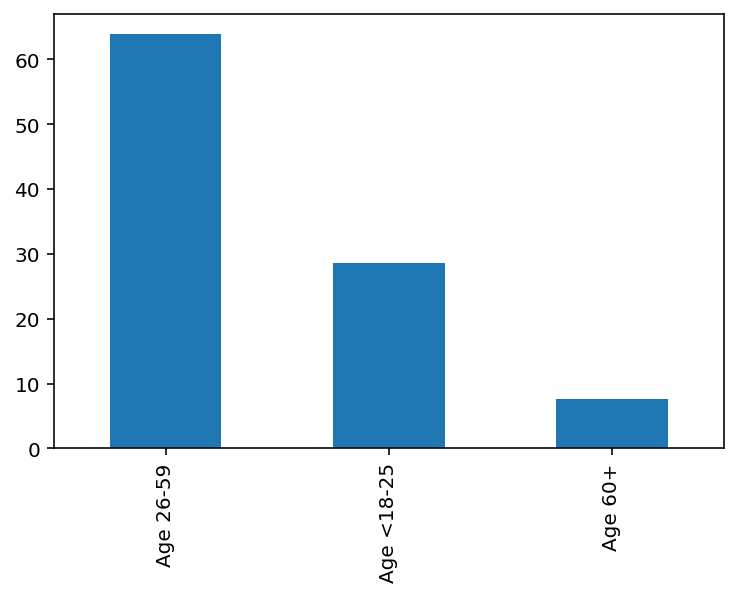

In [331]:
age_group_dist_perc.plot.bar()

Male             21079
Female           16687
Other/Unknown      506
Name: gender, dtype: int64
Male             55.076819
Female           43.601066
Other/Unknown     1.322115
Name: gender, dtype: float64


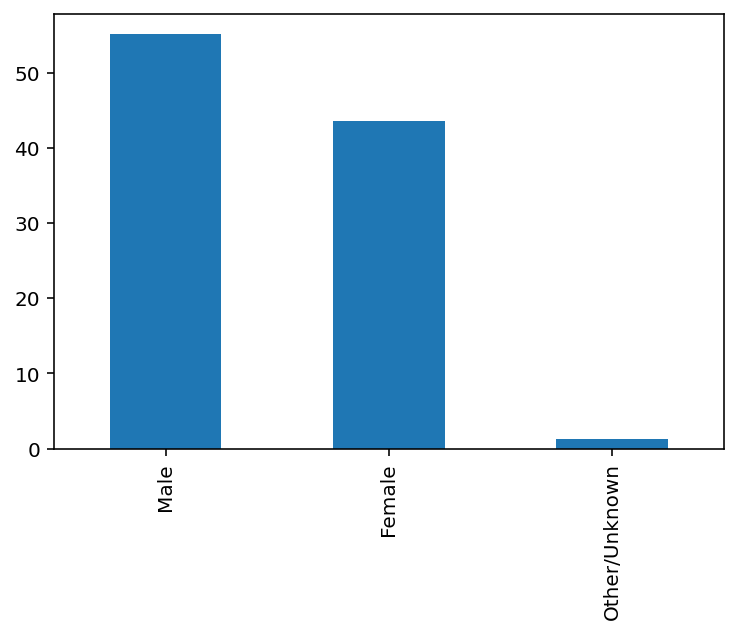

In [332]:
# gender distribution
gender_dist = data[['client_id','gender']].groupby('client_id').max().gender.value_counts()
gender_dist_perc = data[['client_id','gender']].groupby('client_id').max().gender.value_counts(normalize=True) * 100
print(gender_dist)
print(gender_dist_perc)
gender_dist_perc.plot.bar()

English                     31771
Other/Unknown                3382
Spanish                      2125
Asian languages               411
Middle Eastern languages      222
Name: lang, dtype: int64
English                     83.804173
Other/Unknown                8.920894
Spanish                      5.605233
Asian languages              1.084118
Middle Eastern languages     0.585582
Name: lang, dtype: float64


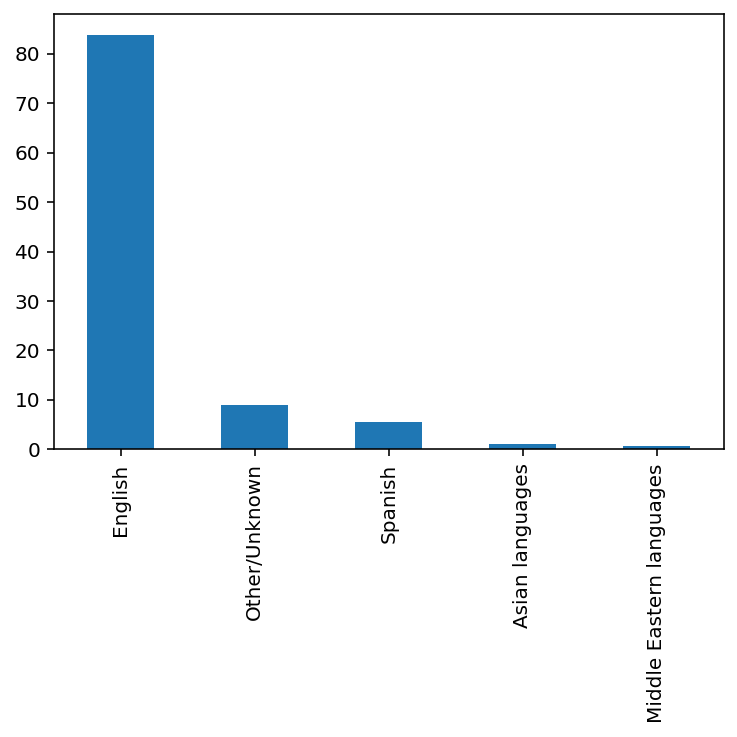

In [333]:
# language distribution
lang_dist = data[['client_id','lang']].groupby('client_id').max().lang.value_counts()
lang_dist_perc = data[['client_id','lang']].groupby('client_id').max().lang.value_counts(normalize=True) * 100
print(lang_dist)
print(lang_dist_perc)
lang_dist_perc.plot.bar()

White                     17769
Hispanic                   9114
Black                      4595
Unknown                    3635
Asian/Pacific Islander     1777
Other                      1089
Native American             293
Name: race, dtype: int64
White                     46.428198
Hispanic                  23.813754
Black                     12.006166
Unknown                    9.497805
Asian/Pacific Islander     4.643081
Other                      2.845422
Native American            0.765573
Name: race, dtype: float64


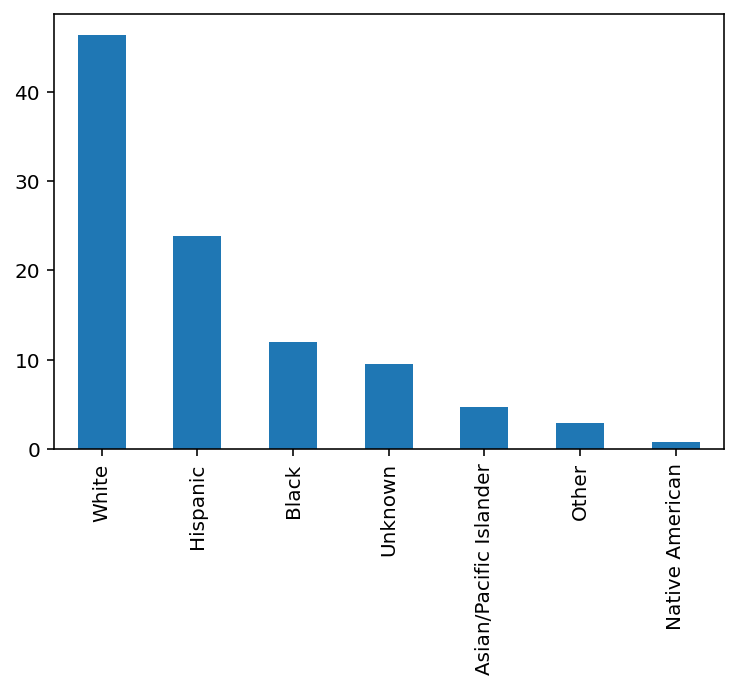

In [334]:
# race distribution
race_dist = data[['client_id','race']].groupby('client_id').max().race.value_counts()
race_dist_perc = data[['client_id','race']].groupby('client_id').max().race.value_counts(normalize=True) * 100
print(race_dist)
print(race_dist_perc)
race_dist_perc.plot.bar()

Unknown/Not Reported                12028
High School Diploma/GED              9997
High School Not Completed            7119
Some College/Vocational Training     4042
Associates Degree                    2431
Bachelors Degree                     1769
Masters Degree                        423
Doctoral Degree                        95
Name: educ, dtype: int64
Unknown/Not Reported                31.732799
High School Diploma/GED             26.374525
High School Not Completed           18.781659
Some College/Vocational Training    10.663782
Associates Degree                    6.413571
Bachelors Degree                     4.667054
Masters Degree                       1.115977
Doctoral Degree                      0.250633
Name: educ, dtype: float64


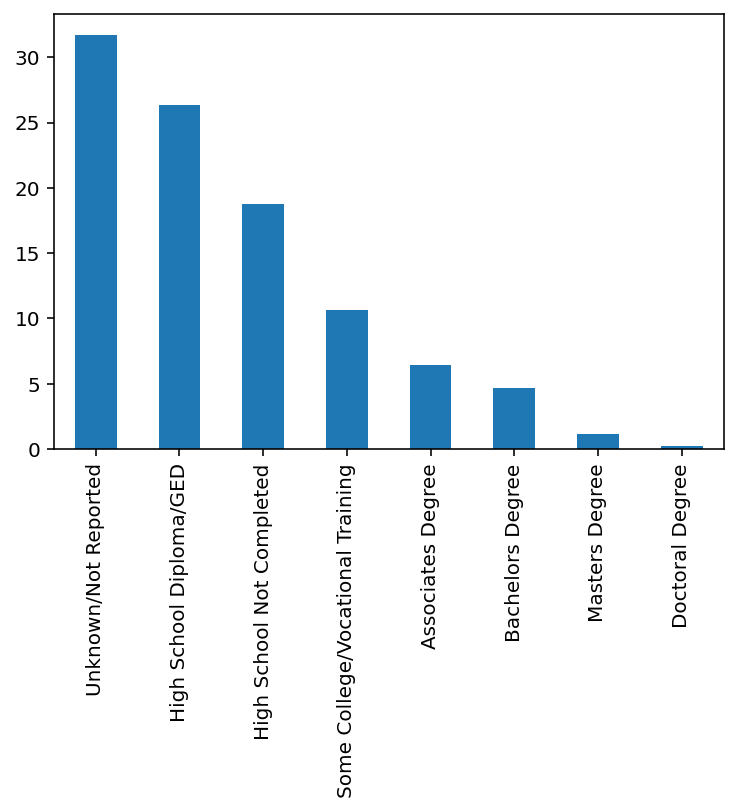

In [335]:
# education level
educ_dist = data[['client_id','educ']].groupby('client_id').max().educ.value_counts()
educ_dist_perc = data[['client_id','educ']].groupby('client_id').max().educ.value_counts(normalize=True) * 100
print(educ_dist)
print(educ_dist_perc)
educ_dist_perc.plot.bar()

Schizophrenia and Other Psychotic Disorders    15494
Depressive Disorders                            9194
Bipolar Disorders                               7585
Other/ Excluded                                 1187
Stressor and Adjustment Disorders                581
Anxiety Disorders                                355
Name: dx_group, dtype: int64
Schizophrenia and Other Psychotic Disorders    45.045936
Depressive Disorders                           26.729852
Bipolar Disorders                              22.051983
Other/ Excluded                                 3.450983
Stressor and Adjustment Disorders               1.689150
Anxiety Disorders                               1.032097
Name: dx_group, dtype: float64


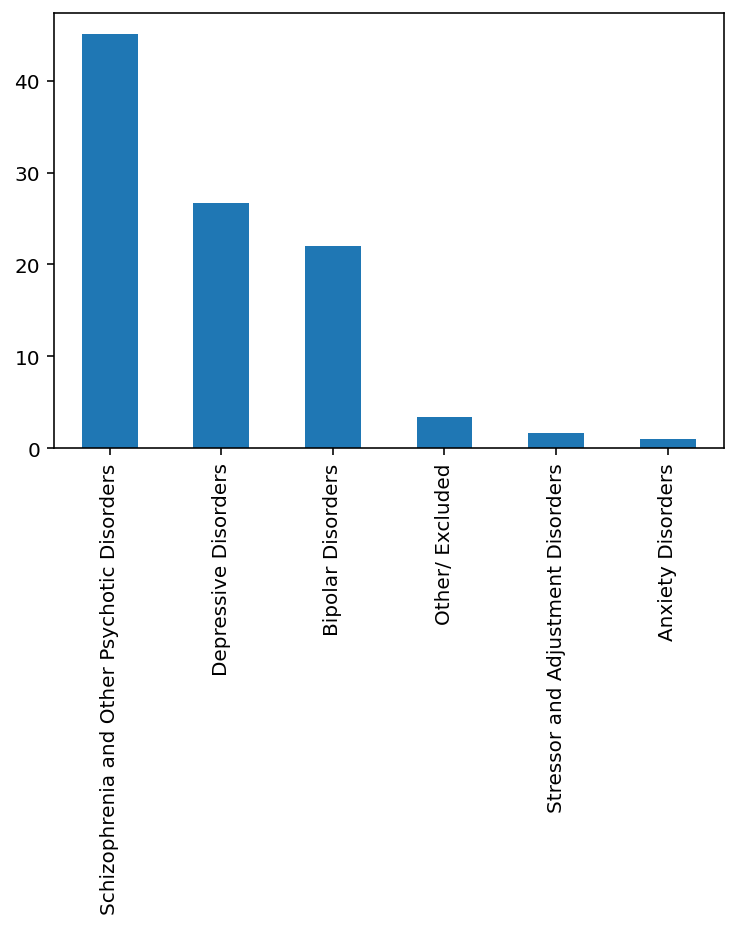

In [336]:
# diagnosis distribution
dx_group_dist = data[['client_id','dx_group']].groupby('client_id').max().dx_group.value_counts()
dx_group_dist_perc = data[['client_id','dx_group']].groupby('client_id').max().dx_group.value_counts(normalize=True) * 100
print(dx_group_dist)
print(dx_group_dist_perc)
dx_group_dist_perc.plot.bar()

1.0    22931
0.0    15072
Name: substance, dtype: int64
1.0    60.339973
0.0    39.660027
Name: substance, dtype: float64


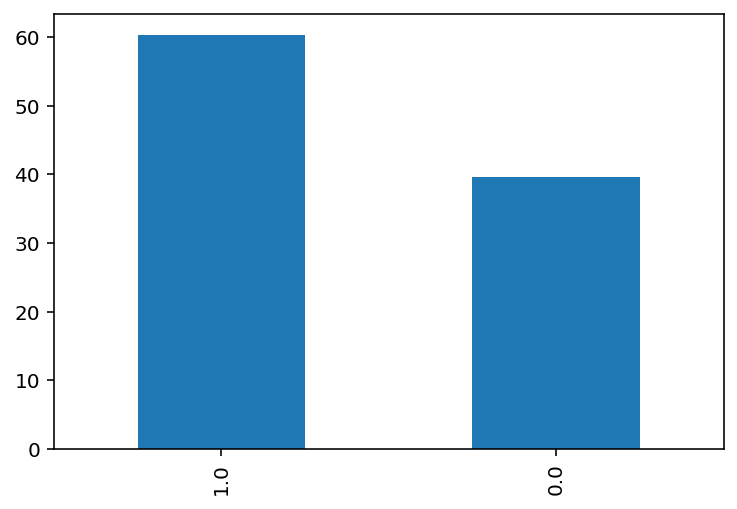

In [337]:
# substance abuse
sub_dist = data[['client_id','substance']].groupby('client_id').max().substance.value_counts()
sub_dist_perc = data[['client_id','substance']].groupby('client_id').max().substance.value_counts(normalize=True) * 100
print(sub_dist)
print(sub_dist_perc)
sub_dist_perc.plot.bar()

Medi-Cal + Medicare    25234
Uninsured/Unknown      10940
Private                 1737
Name: insurance, dtype: int64
Medi-Cal + Medicare    66.561156
Uninsured/Unknown      28.857060
Private                 4.581784
Name: insurance, dtype: float64


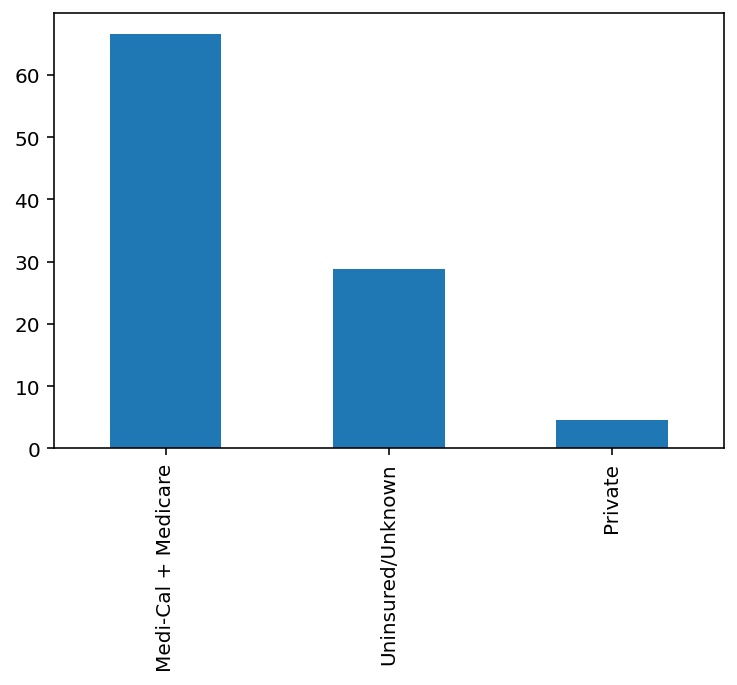

In [338]:
# insurance distribution
ins_dist = data[['client_id','insurance']].groupby('client_id').max().insurance.value_counts()
ins_dist_perc = data[['client_id','insurance']].groupby('client_id').max().insurance.value_counts(normalize=True) * 100
print(ins_dist)
print(ins_dist_perc)
ins_dist_perc.plot.bar()

Not in Labor Force                11471
Unknown                            7433
Not Seeking Work                   6616
Seeking Work                       6156
Competitive Job                    2934
Other                              2909
Resident/Inmate of Institution      385
Name: emp, dtype: int64
Not in Labor Force                30.263297
Unknown                           19.610068
Not Seeking Work                  17.454622
Seeking Work                      16.241030
Competitive Job                    7.740608
Other                              7.674652
Resident/Inmate of Institution     1.015724
Name: emp, dtype: float64


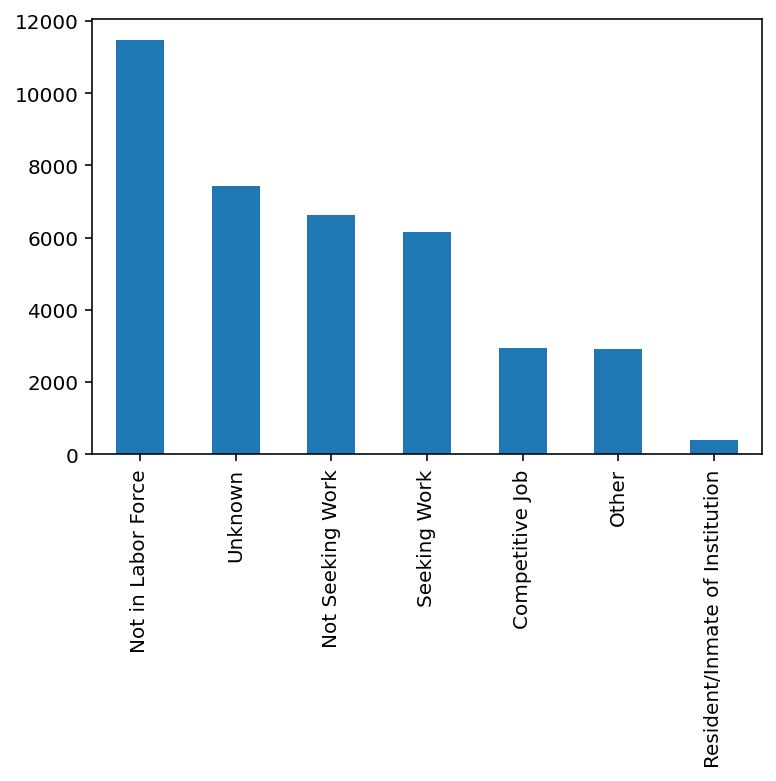

In [339]:
# employment
employment_dist = data[['client_id','emp']].groupby('client_id').max().emp.value_counts()
employment_dist_perc = data[['client_id','emp']].groupby('client_id').max().emp.value_counts(normalize=True) * 100
print(employment_dist)
print(employment_dist_perc)
employment_dist.plot.bar()

Lives Independently    23607
Homeless                7021
Other/Unknown           4488
Board & Care            1631
Institutional            854
Justice Related          303
Name: liv, dtype: int64
Lives Independently    62.281026
Homeless               18.523111
Other/Unknown          11.840439
Board & Care            4.302976
Institutional           2.253060
Justice Related         0.799388
Name: liv, dtype: float64


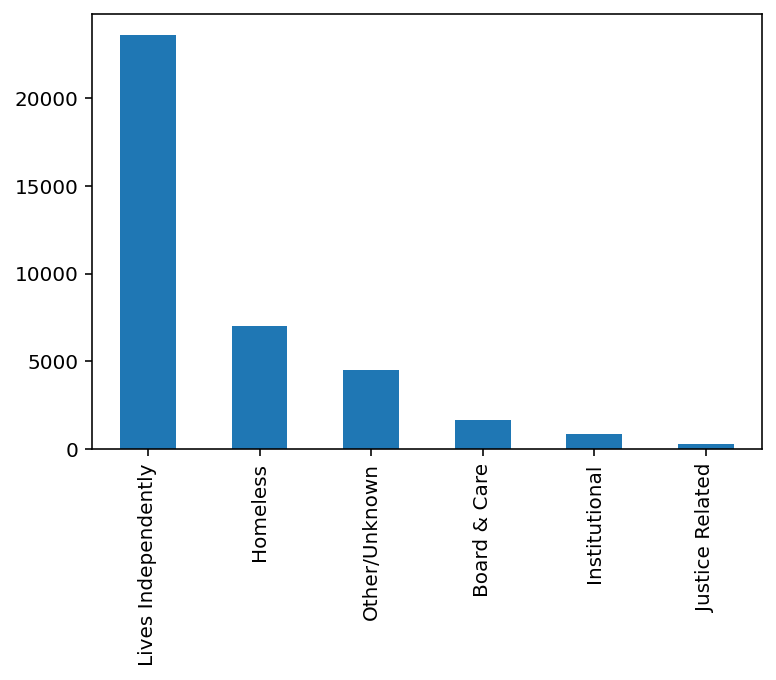

In [340]:
# living situation
living_dist = data[['client_id','liv']].groupby('client_id').max().liv.value_counts()
living_dist_perc = data[['client_id','liv']].groupby('client_id').max().liv.value_counts(normalize=True) * 100
print(living_dist)
print(living_dist_perc)
living_dist.plot.bar()

Missing/Not Reported    18742
Heterosexual             7800
LGBTQ+                   1215
Name: sexorient, dtype: int64
Missing/Not Reported    67.521706
Heterosexual            28.101020
LGBTQ+                   4.377274
Name: sexorient, dtype: float64


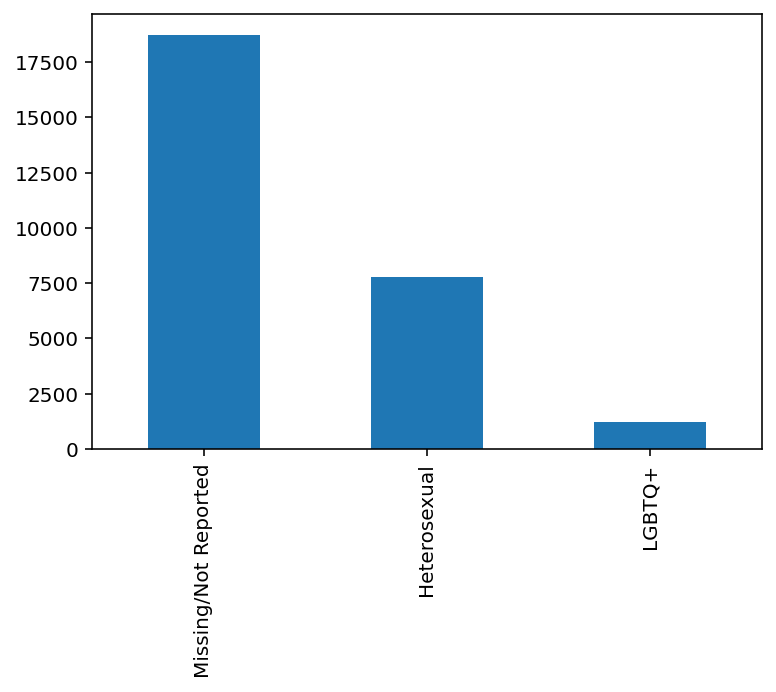

In [341]:
# sexual orientation
sexorient_dist = data[['client_id','sexorient']].groupby('client_id').max().sexorient.value_counts()
sexorient_dist_perc = data[['client_id','sexorient']].groupby('client_id').max().sexorient.value_counts(normalize=True) * 100
print(sexorient_dist)
print(sexorient_dist_perc)
sexorient_dist.plot.bar()

Home/Shelter/Self                   17646
Satisfactorily Achieved\r\nGoals    12722
 Unplanned, AMA or\r\nUnknown        2155
Crisis Residence                     1469
Other                                 979
Psychiatric Hospital                  853
Do Not Use / Auto\r\nClosed           604
Medical Hospital                      415
Homeless                              250
Nursing Home SNF/ICF                  248
Required Lower Level\r\nof Care       238
IMD/MHRC                              215
Board & Care                          122
Against Medical Advice                117
Jail                                   87
State Hospital                         58
Transfer Medical Hospital              49
Required Higher Level\r\nof Care       25
Required Same Level\r\nof Care          8
Death/Expired                           4
Incarcerated                            3
Moved                                   2
Per Court Order                         2
Client/Family\r\nDissatisfied     

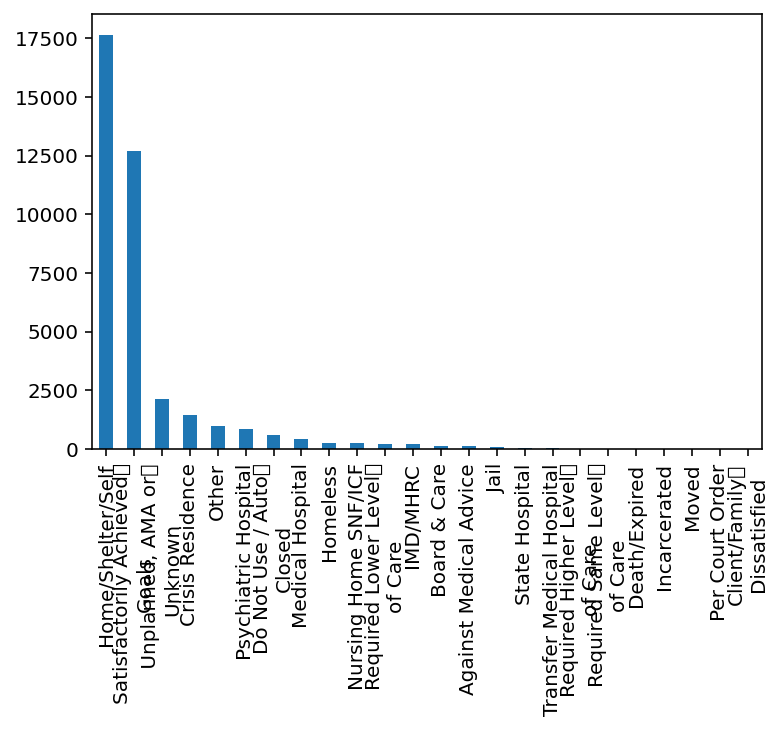

In [342]:
# discharge reason
discharge_dist = data[['client_id','as_close']].groupby('client_id').max().as_close.value_counts()
discharge_dist_perc = data[['client_id','as_close']].groupby('client_id').max().as_close.value_counts(normalize=True) * 100
print(discharge_dist)
print(discharge_dist_perc)
discharge_dist.plot.bar()

1.0    21768
0.0    16235
Name: co, dtype: int64
1.0    57.279688
0.0    42.720312
Name: co, dtype: float64


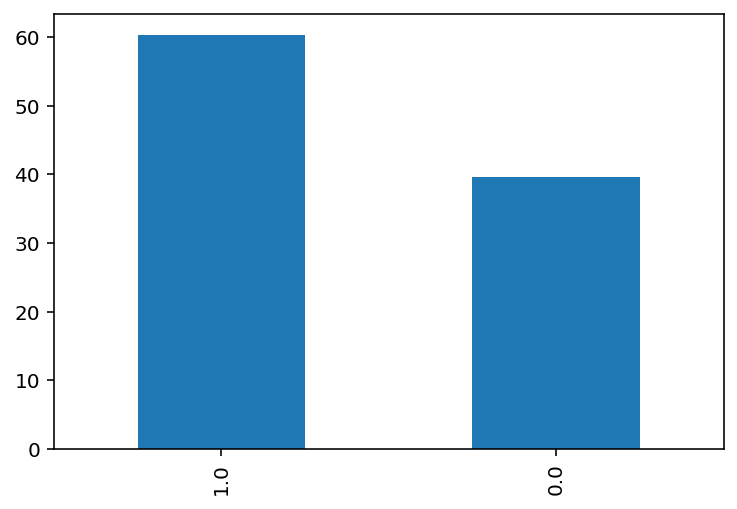

In [343]:
# co-occurring
co_dist = data[['client_id','co']].groupby('client_id').max().co.value_counts()
co_dist_perc = data[['client_id','co']].groupby('client_id').max().co.value_counts(normalize=True) * 100
print(co_dist)
print(co_dist_perc)
sub_dist_perc.plot.bar()

## Part 2 - Level of care (LOC) by timepoints (7,30,60 and 90 days) summary

### A1. 7 days pre service and LOC

In [344]:
svc_AOA_op_7days_pre_service = data[['svc_AOA_op_7days_pre']].svc_AOA_op_7days_pre > 0
svc_AOA_op_7days_pre_service = svc_AOA_op_7days_pre_service.sum()
svc_AOA_op_7days_pre_service_perc = round(svc_AOA_op_7days_pre_service/total_unique_IP * 100, 1)
svc_AOA_op_7days_pre_visit = data[['svc_AOA_op_7days_pre']].svc_AOA_op_7days_pre.sum()
svc_AOA_op_7days_pre_client = data[['client_id','svc_AOA_op_7days_pre']].groupby('client_id').max().svc_AOA_op_7days_pre.value_counts()
svc_AOA_op_7days_pre_perc_user = round(svc_AOA_op_7days_pre_client[1]/total_unique_client*100,1)
svc_AOA_op_7days_pre_client_mean = round(svc_AOA_op_7days_pre_visit/svc_AOA_op_7days_pre_client[1],1)
print('svc_AOA_op_7days_pre')
print("Total cases that have at least 1 OP service:", svc_AOA_op_7days_pre_service)
print("% cases that have at least 1 OP service:", svc_AOA_op_7days_pre_service_perc)
print("Total visit:", svc_AOA_op_7days_pre_visit)
print("Total client:", svc_AOA_op_7days_pre_client[1])
print("Percent users:", svc_AOA_op_7days_pre_perc_user)
print("Mean visit among users:", svc_AOA_op_7days_pre_client_mean)


print('################################')
svc_AOA_es_7days_pre_service = data[['svc_AOA_es_7days_pre']].svc_AOA_es_7days_pre > 0
svc_AOA_es_7days_pre_service = svc_AOA_es_7days_pre_service.sum()
svc_AOA_es_7days_pre_service_perc = round(svc_AOA_es_7days_pre_service/total_unique_IP * 100, 1)
svc_AOA_es_7days_pre_visit = data[['svc_AOA_es_7days_pre']].svc_AOA_es_7days_pre.sum()
svc_AOA_es_7days_pre_client = data[['client_id','svc_AOA_es_7days_pre']].groupby('client_id').max().svc_AOA_es_7days_pre.value_counts()
svc_AOA_es_7days_pre_perc_user = round(svc_AOA_es_7days_pre_client[1]/total_unique_client*100,1)
svc_AOA_es_7days_pre_client_mean = round(svc_AOA_es_7days_pre_visit/svc_AOA_es_7days_pre_client[1],1)
print('svc_AOA_es_7days_pre')
print("Total cases that have at least 1 ES service:", svc_AOA_es_7days_pre_service)
print("% cases that have at least 1 ES service:", svc_AOA_es_7days_pre_service_perc)
print("Total visit:", svc_AOA_es_7days_pre_visit)
print("Total client:", svc_AOA_es_7days_pre_client[1])
print("Percent users:", svc_AOA_es_7days_pre_perc_user)
print("Mean visit among users:", svc_AOA_es_7days_pre_client_mean)

print('################################')
svc_AOA_ip_7days_pre_service = data[['svc_AOA_ip_7days_pre']].svc_AOA_ip_7days_pre > 0
svc_AOA_ip_7days_pre_service = svc_AOA_ip_7days_pre_service.sum()
svc_AOA_ip_7days_pre_service_perc = round(svc_AOA_ip_7days_pre_service/total_unique_IP * 100, 1)
svc_AOA_ip_7days_pre_visit = data[['svc_AOA_ip_7days_pre']].svc_AOA_ip_7days_pre.sum()
svc_AOA_ip_7days_pre_client = data[['client_id','svc_AOA_ip_7days_pre']].groupby('client_id').max().svc_AOA_ip_7days_pre.value_counts()
svc_AOA_ip_7days_pre_perc_user = round(svc_AOA_ip_7days_pre_client[1]/total_unique_client*100,1)
svc_AOA_ip_7days_pre_client_mean = round(svc_AOA_ip_7days_pre_visit/svc_AOA_ip_7days_pre_client[1],1)
print('svc_AOA_ip_7days_pre')
print("Total service:", svc_AOA_ip_7days_pre_service)
print("Total service %:", svc_AOA_ip_7days_pre_service_perc)
print("Total visit:", svc_AOA_ip_7days_pre_visit)
print("Total client:", svc_AOA_ip_7days_pre_client[1])
print("Percent users:", svc_AOA_ip_7days_pre_perc_user)
print("Mean visit among users:", svc_AOA_ip_7days_pre_client_mean)

print('################################')
# COnvert 24h service from visits to days
data.svc_AOA_24h_7days_pre = data.day_loc_pre_7days_EDG + data.day_loc_pre_7days_LTC + data.day_loc_pre_7days_LTCINST + data.day_loc_pre_7days_LTCRES + data.day_loc_pre_7days_RES 

svc_AOA_24h_7days_pre_service = data[['svc_AOA_24h_7days_pre']].svc_AOA_24h_7days_pre > 0
svc_AOA_24h_7days_pre_service = svc_AOA_24h_7days_pre_service.sum()
svc_AOA_24h_7days_pre_service_perc = round(svc_AOA_24h_7days_pre_service/total_unique_IP * 100, 1)
svc_AOA_24h_7days_pre_day = data[['svc_AOA_24h_7days_pre']].svc_AOA_24h_7days_pre.sum()
svc_AOA_24h_7days_pre_client = data[['client_id','svc_AOA_24h_7days_pre']].groupby('client_id').max().svc_AOA_24h_7days_pre.value_counts()
svc_AOA_24h_7days_pre_perc_user = round(svc_AOA_24h_7days_pre_client[1]/total_unique_client*100,1)
svc_AOA_24h_7days_pre_client_mean = round(svc_AOA_24h_7days_pre_day/svc_AOA_24h_7days_pre_client[1],1)
print('svc_AOA_24h_7days_pre')
print("Total cases that have at least 1 24h service:", svc_AOA_24h_7days_pre_service)
print("% cases that have at least 1 24h service:", svc_AOA_24h_7days_pre_service_perc)
print("Total days:", svc_AOA_24h_7days_pre_day)
print("Total client:", svc_AOA_24h_7days_pre_client[1])
print("Percent users:", svc_AOA_24h_7days_pre_perc_user)
print("Mean visit among users:", svc_AOA_24h_7days_pre_client_mean)


svc_AOA_op_7days_pre
Total cases that have at least 1 OP service: 22553
% cases that have at least 1 OP service: 21.5
Total visit: 62783
Total client: 3219
Percent users: 7.4
Mean visit among users: 19.5
################################
svc_AOA_es_7days_pre
Total cases that have at least 1 ES service: 35732
% cases that have at least 1 ES service: 34.1
Total visit: 123911
Total client: 1687
Percent users: 3.9
Mean visit among users: 73.5
################################
svc_AOA_ip_7days_pre
Total service: 4017
Total service %: 3.8
Total visit: 4125
Total client: 2363
Percent users: 5.4
Mean visit among users: 1.7
################################
svc_AOA_24h_7days_pre
Total cases that have at least 1 24h service: 92
% cases that have at least 1 24h service: 0.1
Total days: 1179
Total client: 30
Percent users: 0.1
Mean visit among users: 39.3


### A2. 30 days pre service and LOC

In [345]:
svc_AOA_op_30days_pre_service = data[['svc_AOA_op_30days_pre']].svc_AOA_op_30days_pre > 0
svc_AOA_op_30days_pre_service = svc_AOA_op_30days_pre_service.sum()
svc_AOA_op_30days_pre_service_perc = round(svc_AOA_op_30days_pre_service/total_unique_IP * 100, 1)
svc_AOA_op_30days_pre_visit = data[['svc_AOA_op_30days_pre']].svc_AOA_op_30days_pre.sum()
svc_AOA_op_30days_pre_client = data[['client_id','svc_AOA_op_30days_pre']].groupby('client_id').max().svc_AOA_op_30days_pre.value_counts()
svc_AOA_op_30days_pre_perc_user = round(svc_AOA_op_30days_pre_client[1]/total_unique_client*100,1)
svc_AOA_op_30days_pre_client_mean = round(svc_AOA_op_30days_pre_visit/svc_AOA_op_30days_pre_client[1],1)
print('svc_AOA_op_30days_pre')
print("Total cases that have at least 1 OP service:", svc_AOA_op_30days_pre_service)
print("% cases that have at least 1 OP service:", svc_AOA_op_30days_pre_service_perc)
print("Total visit:", svc_AOA_op_30days_pre_visit)
print("Total client:", svc_AOA_op_30days_pre_client[1])
print("Percent users:", svc_AOA_op_30days_pre_perc_user)
print("Mean visit among users:", svc_AOA_op_30days_pre_client_mean)


print('################################')
svc_AOA_es_30days_pre_service = data[['svc_AOA_es_30days_pre']].svc_AOA_es_30days_pre > 0
svc_AOA_es_30days_pre_service = svc_AOA_es_30days_pre_service.sum()
svc_AOA_es_30days_pre_service_perc = round(svc_AOA_es_30days_pre_service/total_unique_IP * 100, 1)
svc_AOA_es_30days_pre_visit = data[['svc_AOA_es_30days_pre']].svc_AOA_es_30days_pre.sum()
svc_AOA_es_30days_pre_client = data[['client_id','svc_AOA_es_30days_pre']].groupby('client_id').max().svc_AOA_es_30days_pre.value_counts()
svc_AOA_es_30days_pre_perc_user = round(svc_AOA_es_30days_pre_client[1]/total_unique_client*100,1)
svc_AOA_es_30days_pre_client_mean = round(svc_AOA_es_30days_pre_visit/svc_AOA_es_30days_pre_client[1],1)
print('svc_AOA_es_30days_pre')
print("Total cases that have at least 1 ES service:", svc_AOA_es_30days_pre_service)
print("% cases that have at least 1 ES service:", svc_AOA_es_30days_pre_service_perc)
print("Total visit:", svc_AOA_es_30days_pre_visit)
print("Total client:", svc_AOA_es_30days_pre_client[1])
print("Percent users:", svc_AOA_es_30days_pre_perc_user)
print("Mean visit among users:", svc_AOA_es_30days_pre_client_mean)

print('################################')
svc_AOA_ip_30days_pre_service = data[['svc_AOA_ip_30days_pre']].svc_AOA_ip_30days_pre > 0
svc_AOA_ip_30days_pre_service = svc_AOA_ip_30days_pre_service.sum()
svc_AOA_ip_30days_pre_service_perc = round(svc_AOA_ip_30days_pre_service/total_unique_IP * 100, 1)
svc_AOA_ip_30days_pre_visit = data[['svc_AOA_ip_30days_pre']].svc_AOA_ip_30days_pre.sum()
svc_AOA_ip_30days_pre_client = data[['client_id','svc_AOA_ip_30days_pre']].groupby('client_id').max().svc_AOA_ip_30days_pre.value_counts()
svc_AOA_ip_30days_pre_perc_user = round(svc_AOA_ip_30days_pre_client[1]/total_unique_client*100,1)
svc_AOA_ip_30days_pre_client_mean = round(svc_AOA_ip_30days_pre_visit/svc_AOA_ip_30days_pre_client[1],1)
print('svc_AOA_ip_30days_pre')
print("Total service:", svc_AOA_ip_30days_pre_service)
print("Total service %:", svc_AOA_ip_30days_pre_service_perc)
print("Total visit:", svc_AOA_ip_30days_pre_visit)
print("Total client:", svc_AOA_ip_30days_pre_client[1])
print("Percent users:", svc_AOA_ip_30days_pre_perc_user)
print("Mean visit among users:", svc_AOA_ip_30days_pre_client_mean)

print('################################')
# COnvert 24h service from visits to days
data.svc_AOA_24h_30days_pre = data.day_loc_pre_30days_EDG + data.day_loc_pre_30days_LTC + data.day_loc_pre_30days_LTCINST + data.day_loc_pre_30days_LTCRES + data.day_loc_pre_30days_RES 

svc_AOA_24h_30days_pre_service = data[['svc_AOA_24h_30days_pre']].svc_AOA_24h_30days_pre > 0
svc_AOA_24h_30days_pre_service = svc_AOA_24h_30days_pre_service.sum()
svc_AOA_24h_30days_pre_service_perc = round(svc_AOA_24h_30days_pre_service/total_unique_IP * 100, 1)
svc_AOA_24h_30days_pre_day = data[['svc_AOA_24h_30days_pre']].svc_AOA_24h_30days_pre.sum()
svc_AOA_24h_30days_pre_client = data[['client_id','svc_AOA_24h_30days_pre']].groupby('client_id').max().svc_AOA_24h_30days_pre.value_counts()
svc_AOA_24h_30days_pre_perc_user = round(svc_AOA_24h_30days_pre_client[1]/total_unique_client*100,1)
svc_AOA_24h_30days_pre_client_mean = round(svc_AOA_24h_30days_pre_day/svc_AOA_24h_30days_pre_client[1],1)
print('svc_AOA_24h_30days_pre')
print("Total cases that have at least 1 24h service:", svc_AOA_24h_30days_pre_service)
print("% cases that have at least 1 24h service:", svc_AOA_24h_30days_pre_service_perc)
print("Total days:", svc_AOA_24h_30days_pre_day)
print("Total client:", svc_AOA_24h_30days_pre_client[1])
print("Percent users:", svc_AOA_24h_30days_pre_perc_user)
print("Mean visit among users:", svc_AOA_24h_30days_pre_client_mean)

svc_AOA_op_30days_pre
Total cases that have at least 1 OP service: 33019
% cases that have at least 1 OP service: 31.5
Total visit: 192847
Total client: 2676
Percent users: 6.1
Mean visit among users: 72.1
################################
svc_AOA_es_30days_pre
Total cases that have at least 1 ES service: 43433
% cases that have at least 1 ES service: 41.4
Total visit: 193694
Total client: 1494
Percent users: 3.4
Mean visit among users: 129.6
################################
svc_AOA_ip_30days_pre
Total service: 19761
Total service %: 18.8
Total visit: 24902
Total client: 5359
Percent users: 12.3
Mean visit among users: 4.6
################################
svc_AOA_24h_30days_pre
Total cases that have at least 1 24h service: 219
% cases that have at least 1 24h service: 0.2
Total days: 3309
Total client: 16
Percent users: 0.0
Mean visit among users: 206.8


### A3. 60 days pre service and LOC

In [346]:
svc_AOA_op_60days_pre_service = data[['svc_AOA_op_60days_pre']].svc_AOA_op_60days_pre > 0
svc_AOA_op_60days_pre_service = svc_AOA_op_60days_pre_service.sum()
svc_AOA_op_60days_pre_service_perc = round(svc_AOA_op_60days_pre_service/total_unique_IP * 100, 1)
svc_AOA_op_60days_pre_visit = data[['svc_AOA_op_60days_pre']].svc_AOA_op_60days_pre.sum()
svc_AOA_op_60days_pre_client = data[['client_id','svc_AOA_op_60days_pre']].groupby('client_id').max().svc_AOA_op_60days_pre.value_counts()
svc_AOA_op_60days_pre_perc_user = round(svc_AOA_op_60days_pre_client[1]/total_unique_client*100,1)
svc_AOA_op_60days_pre_client_mean = round(svc_AOA_op_60days_pre_visit/svc_AOA_op_60days_pre_client[1],1)
print('svc_AOA_op_60days_pre')
print("Total cases that have at least 1 OP service:", svc_AOA_op_60days_pre_service)
print("% cases that have at least 1 OP service:", svc_AOA_op_60days_pre_service_perc)
print("Total visit:", svc_AOA_op_60days_pre_visit)
print("Total client:", svc_AOA_op_60days_pre_client[1])
print("Percent users:", svc_AOA_op_60days_pre_perc_user)
print("Mean visit among users:", svc_AOA_op_60days_pre_client_mean)


print('################################')
svc_AOA_es_60days_pre_service = data[['svc_AOA_es_60days_pre']].svc_AOA_es_60days_pre > 0
svc_AOA_es_60days_pre_service = svc_AOA_es_60days_pre_service.sum()
svc_AOA_es_60days_pre_service_perc = round(svc_AOA_es_60days_pre_service/total_unique_IP * 100, 1)
svc_AOA_es_60days_pre_visit = data[['svc_AOA_es_60days_pre']].svc_AOA_es_60days_pre.sum()
svc_AOA_es_60days_pre_client = data[['client_id','svc_AOA_es_60days_pre']].groupby('client_id').max().svc_AOA_es_60days_pre.value_counts()
svc_AOA_es_60days_pre_perc_user = round(svc_AOA_es_60days_pre_client[1]/total_unique_client*100,1)
svc_AOA_es_60days_pre_client_mean = round(svc_AOA_es_60days_pre_visit/svc_AOA_es_60days_pre_client[1],1)
print('svc_AOA_es_60days_pre')
print("Total cases that have at least 1 ES service:", svc_AOA_es_60days_pre_service)
print("% cases that have at least 1 ES service:", svc_AOA_es_60days_pre_service_perc)
print("Total visit:", svc_AOA_es_60days_pre_visit)
print("Total client:", svc_AOA_es_60days_pre_client[1])
print("Percent users:", svc_AOA_es_60days_pre_perc_user)
print("Mean visit among users:", svc_AOA_es_60days_pre_client_mean)


print('################################')
svc_AOA_ip_60days_pre_service = data[['svc_AOA_ip_60days_pre']].svc_AOA_ip_60days_pre > 0
svc_AOA_ip_60days_pre_service = svc_AOA_ip_60days_pre_service.sum()
svc_AOA_ip_60days_pre_service_perc = round(svc_AOA_ip_60days_pre_service/total_unique_IP * 100, 1)
svc_AOA_ip_60days_pre_visit = data[['svc_AOA_ip_60days_pre']].svc_AOA_ip_60days_pre.sum()
svc_AOA_ip_60days_pre_client = data[['client_id','svc_AOA_ip_60days_pre']].groupby('client_id').max().svc_AOA_ip_60days_pre.value_counts()
svc_AOA_ip_60days_pre_perc_user = round(svc_AOA_ip_60days_pre_client[1]/total_unique_client*100,1)
svc_AOA_ip_60days_pre_client_mean = round(svc_AOA_ip_60days_pre_visit/svc_AOA_ip_60days_pre_client[1],1)
print('svc_AOA_ip_60days_pre')
print("Total service:", svc_AOA_ip_60days_pre_service)
print("Total service %:", svc_AOA_ip_60days_pre_service_perc)
print("Total visit:", svc_AOA_ip_60days_pre_visit)
print("Total client:", svc_AOA_ip_60days_pre_client[1])
print("Percent users:", svc_AOA_ip_60days_pre_perc_user)
print("Mean visit among users:", svc_AOA_ip_60days_pre_client_mean)

print('################################')
# COnvert 24h service from visits to days
data.svc_AOA_24h_60days_pre = data.day_loc_pre_60days_EDG + data.day_loc_pre_60days_LTC + data.day_loc_pre_60days_LTCINST + data.day_loc_pre_60days_LTCRES + data.day_loc_pre_60days_RES 

svc_AOA_24h_60days_pre_service = data[['svc_AOA_24h_60days_pre']].svc_AOA_24h_60days_pre > 0
svc_AOA_24h_60days_pre_service = svc_AOA_24h_60days_pre_service.sum()
svc_AOA_24h_60days_pre_service_perc = round(svc_AOA_24h_60days_pre_service/total_unique_IP * 100, 1)
svc_AOA_24h_60days_pre_day = data[['svc_AOA_24h_60days_pre']].svc_AOA_24h_60days_pre.sum()
svc_AOA_24h_60days_pre_client = data[['client_id','svc_AOA_24h_60days_pre']].groupby('client_id').max().svc_AOA_24h_60days_pre.value_counts()
svc_AOA_24h_60days_pre_perc_user = round(svc_AOA_24h_60days_pre_client[1]/total_unique_client*100,1)
svc_AOA_24h_60days_pre_client_mean = round(svc_AOA_24h_60days_pre_day/svc_AOA_24h_60days_pre_client[1],1)
print('svc_AOA_24h_60days_pre')
print("Total cases that have at least 1 24h service:", svc_AOA_24h_60days_pre_service)
print("% cases that have at least 1 24h service:", svc_AOA_24h_60days_pre_service_perc)
print("Total days:", svc_AOA_24h_60days_pre_day)
print("Total client:", svc_AOA_24h_60days_pre_client[1])
print("Percent users:", svc_AOA_24h_60days_pre_perc_user)
print("Mean visit among users:", svc_AOA_24h_60days_pre_client_mean)

svc_AOA_op_60days_pre
Total cases that have at least 1 OP service: 37972
% cases that have at least 1 OP service: 36.2
Total visit: 346263
Total client: 2289
Percent users: 5.2
Mean visit among users: 151.3
################################
svc_AOA_es_60days_pre
Total cases that have at least 1 ES service: 48203
% cases that have at least 1 ES service: 46.0
Total visit: 258965
Total client: 1466
Percent users: 3.4
Mean visit among users: 176.6
################################
svc_AOA_ip_60days_pre
Total service: 28792
Total service %: 27.5
Total visit: 45394
Total client: 5651
Percent users: 12.9
Mean visit among users: 8.0
################################
svc_AOA_24h_60days_pre
Total cases that have at least 1 24h service: 325
% cases that have at least 1 24h service: 0.3
Total days: 7514
Total client: 13
Percent users: 0.0
Mean visit among users: 578.0


### A4. 90 days pre service and LOC

In [347]:
svc_AOA_op_90days_pre_service = data[['svc_AOA_op_90days_pre']].svc_AOA_op_90days_pre > 0
svc_AOA_op_90days_pre_service = svc_AOA_op_90days_pre_service.sum()
svc_AOA_op_90days_pre_service_perc = round(svc_AOA_op_90days_pre_service/total_unique_IP * 100, 1)
svc_AOA_op_90days_pre_visit = data[['svc_AOA_op_90days_pre']].svc_AOA_op_90days_pre.sum()
svc_AOA_op_90days_pre_client = data[['client_id','svc_AOA_op_90days_pre']].groupby('client_id').max().svc_AOA_op_90days_pre.value_counts()
svc_AOA_op_90days_pre_perc_user = round(svc_AOA_op_90days_pre_client[1]/total_unique_client*100,1)
svc_AOA_op_90days_pre_client_mean = round(svc_AOA_op_90days_pre_visit/svc_AOA_op_90days_pre_client[1],1)
print('svc_AOA_op_90days_pre')
print("Total cases that have at least 1 OP service:", svc_AOA_op_90days_pre_service)
print("% cases that have at least 1 OP service:", svc_AOA_op_90days_pre_service_perc)
print("Total visit:", svc_AOA_op_90days_pre_visit)
print("Total client:", svc_AOA_op_90days_pre_client[1])
print("Percent users:", svc_AOA_op_90days_pre_perc_user)
print("Mean visit among users:", svc_AOA_op_90days_pre_client_mean)


print('################################')
svc_AOA_es_90days_pre_service = data[['svc_AOA_es_90days_pre']].svc_AOA_es_90days_pre > 0
svc_AOA_es_90days_pre_service = svc_AOA_es_90days_pre_service.sum()
svc_AOA_es_90days_pre_service_perc = round(svc_AOA_es_90days_pre_service/total_unique_IP * 100, 1)
svc_AOA_es_90days_pre_visit = data[['svc_AOA_es_90days_pre']].svc_AOA_es_90days_pre.sum()
svc_AOA_es_90days_pre_client = data[['client_id','svc_AOA_es_90days_pre']].groupby('client_id').max().svc_AOA_es_90days_pre.value_counts()
svc_AOA_es_90days_pre_perc_user = round(svc_AOA_es_90days_pre_client[1]/total_unique_client*100,1)
svc_AOA_es_90days_pre_client_mean = round(svc_AOA_es_90days_pre_visit/svc_AOA_es_90days_pre_client[1],1)
print('svc_AOA_es_90days_pre')
print("Total cases that have at least 1 ES service:", svc_AOA_es_90days_pre_service)
print("% cases that have at least 1 ES service:", svc_AOA_es_90days_pre_service_perc)
print("Total visit:", svc_AOA_es_90days_pre_visit)
print("Total client:", svc_AOA_es_90days_pre_client[1])
print("Percent users:", svc_AOA_es_90days_pre_perc_user)
print("Mean visit among users:", svc_AOA_es_90days_pre_client_mean)

print('################################')
svc_AOA_ip_90days_pre_service = data[['svc_AOA_ip_90days_pre']].svc_AOA_ip_90days_pre > 0
svc_AOA_ip_90days_pre_service = svc_AOA_ip_90days_pre_service.sum()
svc_AOA_ip_90days_pre_service_perc = round(svc_AOA_ip_90days_pre_service/total_unique_IP * 100, 1)
svc_AOA_ip_90days_pre_visit = data[['svc_AOA_ip_90days_pre']].svc_AOA_ip_90days_pre.sum()
svc_AOA_ip_90days_pre_client = data[['client_id','svc_AOA_ip_90days_pre']].groupby('client_id').max().svc_AOA_ip_90days_pre.value_counts()
svc_AOA_ip_90days_pre_perc_user = round(svc_AOA_ip_90days_pre_client[1]/total_unique_client*100,1)
svc_AOA_ip_90days_pre_client_mean = round(svc_AOA_ip_90days_pre_visit/svc_AOA_ip_90days_pre_client[1],1)
print('svc_AOA_ip_90days_pre')
print("Total service:", svc_AOA_ip_90days_pre_service)
print("Total service %:", svc_AOA_ip_90days_pre_service_perc)
print("Total visit:", svc_AOA_ip_90days_pre_visit)
print("Total client:", svc_AOA_ip_90days_pre_client[1])
print("Percent users:", svc_AOA_ip_90days_pre_perc_user)
print("Mean visit among users:", svc_AOA_ip_90days_pre_client_mean)

print('################################')
# COnvert 24h service from visits to days
data.svc_AOA_24h_90days_pre = data.day_loc_pre_90days_EDG + data.day_loc_pre_90days_LTC + data.day_loc_pre_90days_LTCINST + data.day_loc_pre_90days_LTCRES + data.day_loc_pre_90days_RES 

svc_AOA_24h_90days_pre_service = data[['svc_AOA_24h_90days_pre']].svc_AOA_24h_90days_pre > 0
svc_AOA_24h_90days_pre_service = svc_AOA_24h_90days_pre_service.sum()
svc_AOA_24h_90days_pre_service_perc = round(svc_AOA_24h_90days_pre_service/total_unique_IP * 100, 1)
svc_AOA_24h_90days_pre_day = data[['svc_AOA_24h_90days_pre']].svc_AOA_24h_90days_pre.sum()
svc_AOA_24h_90days_pre_client = data[['client_id','svc_AOA_24h_90days_pre']].groupby('client_id').max().svc_AOA_24h_90days_pre.value_counts()
svc_AOA_24h_90days_pre_perc_user = round(svc_AOA_24h_90days_pre_client[1]/total_unique_client*100,1)
svc_AOA_24h_90days_pre_client_mean = round(svc_AOA_24h_90days_pre_day/svc_AOA_24h_90days_pre_client[1],1)
print('svc_AOA_24h_90days_pre')
print("Total cases that have at least 1 24h service:", svc_AOA_24h_90days_pre_service)
print("% cases that have at least 1 24h service:", svc_AOA_24h_90days_pre_service_perc)
print("Total days:", svc_AOA_24h_90days_pre_day)
print("Total client:", svc_AOA_24h_90days_pre_client[1])
print("Percent users:", svc_AOA_24h_90days_pre_perc_user)
print("Mean visit among users:", svc_AOA_24h_90days_pre_client_mean)

svc_AOA_op_90days_pre
Total cases that have at least 1 OP service: 40941
% cases that have at least 1 OP service: 39.0
Total visit: 491466
Total client: 2076
Percent users: 4.8
Mean visit among users: 236.7
################################
svc_AOA_es_90days_pre
Total cases that have at least 1 ES service: 51364
% cases that have at least 1 ES service: 49.0
Total visit: 312409
Total client: 1462
Percent users: 3.3
Mean visit among users: 213.7
################################
svc_AOA_ip_90days_pre
Total service: 33823
Total service %: 32.3
Total visit: 62068
Total client: 5726
Percent users: 13.1
Mean visit among users: 10.8
################################
svc_AOA_24h_90days_pre
Total cases that have at least 1 24h service: 446
% cases that have at least 1 24h service: 0.4
Total days: 15481
Total client: 11
Percent users: 0.0
Mean visit among users: 1407.4


## Part 3 - LOC by order

In [348]:
loc1_pre_perc = data.loc1_pre.value_counts(normalize=True)*100
loc2_pre_perc = data.loc2_pre.value_counts(normalize=True)*100
loc3_pre_perc = data.loc3_pre.value_counts(normalize=True)*100
loc4_pre_perc = data.loc4_pre.value_counts(normalize=True)*100
loc5_pre_perc = data.loc5_pre.value_counts(normalize=True)*100



In [349]:
pd.concat([loc1_pre_perc, loc2_pre_perc, loc3_pre_perc, loc4_pre_perc, loc5_pre_perc], axis=1)

,loc1_pre,loc2_pre,loc3_pre,loc4_pre,loc5_pre
IPFFS,15.949960,19.881758,16.252527,13.390073,11.105063
CS,15.765696,21.839029,14.497019,16.060291,16.167665
UO,14.884335,8.557651,8.695652,7.932692,6.151334
OP,12.670944,9.204103,10.164547,9.556913,9.417529
FFS,9.458529,7.142324,6.569082,6.867204,7.212847
ACT,8.820265,2.803780,2.981293,1.923077,2.231900
JAIL,5.899787,6.839253,10.448601,10.291060,11.921611
CR,5.312583,7.521536,8.846636,11.174636,13.228089
CMTRAN,2.173430,2.809752,3.562198,3.794179,4.518236
IPCNTY,2.077968,5.376151,9.179313,9.543919,8.900381


## Part 4 - Total services

In [350]:
data[['client_id','svc_pre_all']].groupby('client_id').max().describe()

,svc_pre_all
count,38272.000000
mean,55.557588
std,147.985967
min,0.000000
25%,0.000000
50%,7.000000
75%,40.000000
max,4810.000000


In [351]:
data[['client_id','svc_pre']].groupby('client_id').max().describe()

,svc_pre
count,38272.000000
mean,32.588916
std,83.795999
min,0.000000
25%,0.000000
50%,5.000000
75%,26.000000
max,1815.000000


In [352]:
data[['client_id','svc_pre_sub']].groupby('client_id').max().describe()

,svc_pre_sub
count,38272.000000
mean,0.278454
std,0.451728
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [353]:
data[['client_id','new']].groupby('client_id').max().describe()

,new
count,38272.000000
mean,0.381297
std,0.485712
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [354]:
data[['client_id','new']].groupby('client_id').max().new.value_counts(normalize=True) * 100

0    61.870297
1    38.129703
Name: new, dtype: float64

## Part 4 - Summary of hospitalization data

In [355]:
# IP type distribution
iploc_dist = data[['client_id','as_loc']].groupby('client_id').max().as_loc.value_counts()
iploc_dist_perc = data[['client_id','as_loc']].groupby('client_id').max().as_loc.value_counts(normalize=True) * 100
print(iploc_dist)
print(iploc_dist_perc)

IPFFS     28014
IPCNTY     8433
IPLIHP     1768
IPST         57
Name: as_loc, dtype: int64
IPFFS     73.197115
IPCNTY    22.034385
IPLIHP     4.619565
IPST       0.148934
Name: as_loc, dtype: float64


In [356]:
# Gap from the previous IP to the current IP index
data[['client_id','as_gap_since_former_IP']].groupby('client_id').max().describe()

,as_gap_since_former_IP
count,16401.000000
mean,655.255594
std,721.616038
min,0.000000
25%,99.000000
50%,406.000000
75%,961.000000
max,4107.000000


In [357]:
# Days until the next IP
data[['client_id','as_gap_between_IP']].groupby('client_id').max().describe()

,as_gap_between_IP
count,16061.000000
mean,619.185418
std,701.080563
min,0.000000
25%,83.000000
50%,372.000000
75%,908.000000
max,4098.000000


In [25]:
# Length of stay in the hospital
data[['client_id','as_length_IP']].groupby('client_id').max().describe()

,as_length_IP
count,38272.000000
mean,11.272000
std,38.847962
min,0.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,2420.000000


In [358]:
# Hospitalization history: how many previous IP up to the current IP index
data[['client_id','IP_history']].groupby('client_id').max().describe()

,IP_history
count,38272.000000
mean,1.831391
std,4.787346
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,130.000000


In [359]:
# Calculate the gap day between IP within a year
readmission_data = data.as_gap_between_IP.tolist()
readmission_data = [x for x in readmission_data if ~np.isnan(x)]
readmission_data = filter(lambda readmission_data: readmission_data <= 365, readmission_data)
readmission_data=list(readmission_data)


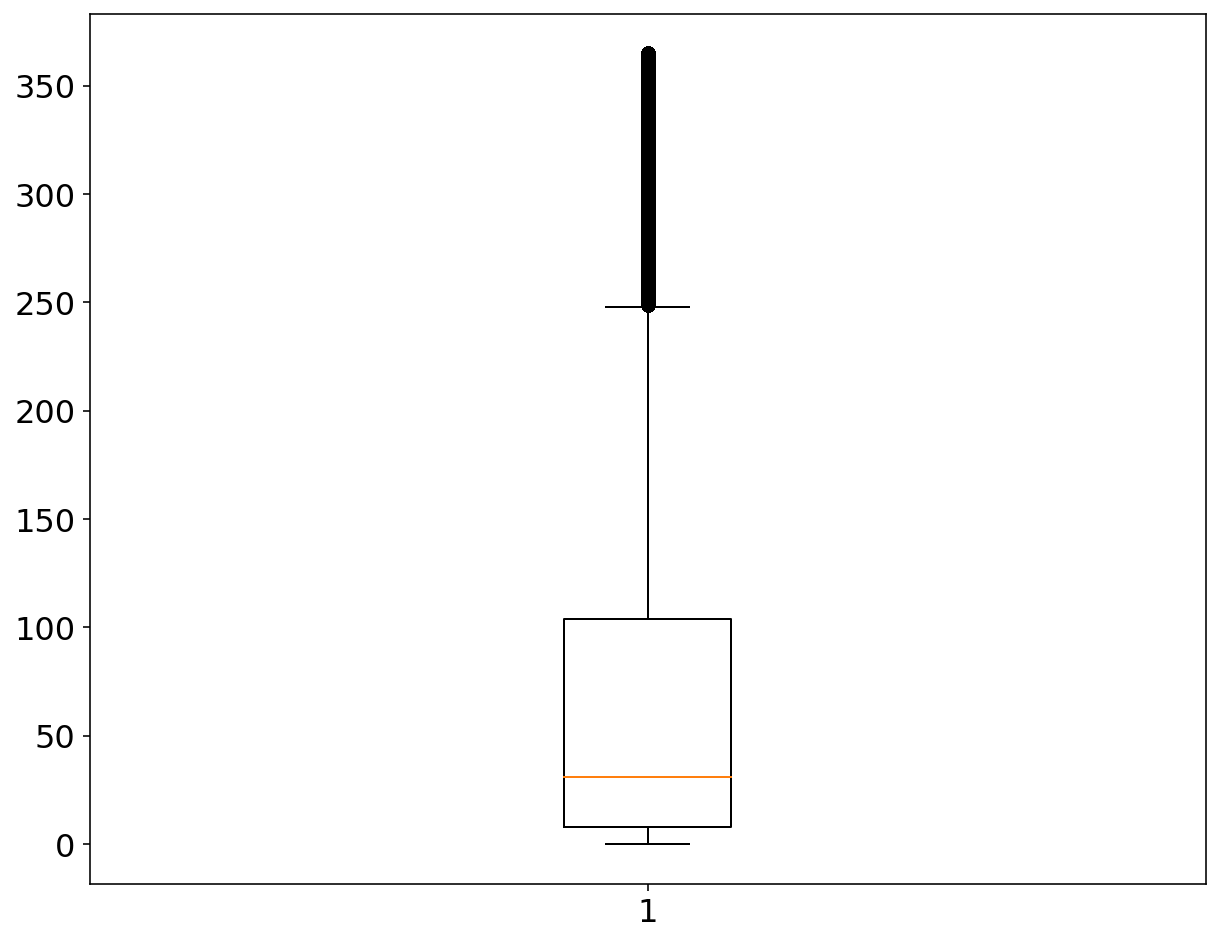

count    55171.000000
mean        71.083558
std         88.033924
min          0.000000
25%          8.000000
50%         31.000000
75%        104.000000
max        365.000000
dtype: float64

In [360]:
# Box plot of gap days from an IP discharge to a psychiatric reshospitalization
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure()
fig.set_size_inches(10,8)
plt.boxplot(readmission_data)
plt.show()

readmission_data = pd.Series(readmission_data)
readmission_data.describe()

(array([3110., 1741., 1688., 1520., 1461., 1325., 1201., 1195., 1065.,
         978.,  877.,  878.,  759.,  768.,  738.,  707.,  606.,  614.,
         633.,  557.,  551.,  535.,  536.,  514.,  482.,  448.,  413.,
         372.,  441.,  382.,  364.,  373.,  335.,  296.,  339.,  321.,
         302.,  306.,  296.,  257.,  314.,  288.,  268.,  300.,  225.,
         228.,  237.,  226.,  221.,  251.,  266.,  243.,  206.,  239.,
         223.,  207.,  201.,  189.,  204.,  163.,  213.,  194.,  202.,
         186.,  188.,  154.,  159.,  177.,  161.,  156.,  159.,  164.,
         150.,  147.,  153.,  139.,  174.,  165.,  137.,  145.,  137.,
         127.,  156.,  142.,  171.,  116.,  123.,  129.,  127.,   85.,
         133.,  142.,  127.,  123.,  126.,  117.,  142.,  121.,  127.,
         119.,  121.,  114.,  118.,  114.,  111.,  129.,  114.,  106.,
         112.,  103.,  125.,   99.,  121.,   99.,   97.,   96.,   95.,
          83.,  102.,  107.,   97.,   94.,   96.,   83.,   91.,   92.,
      

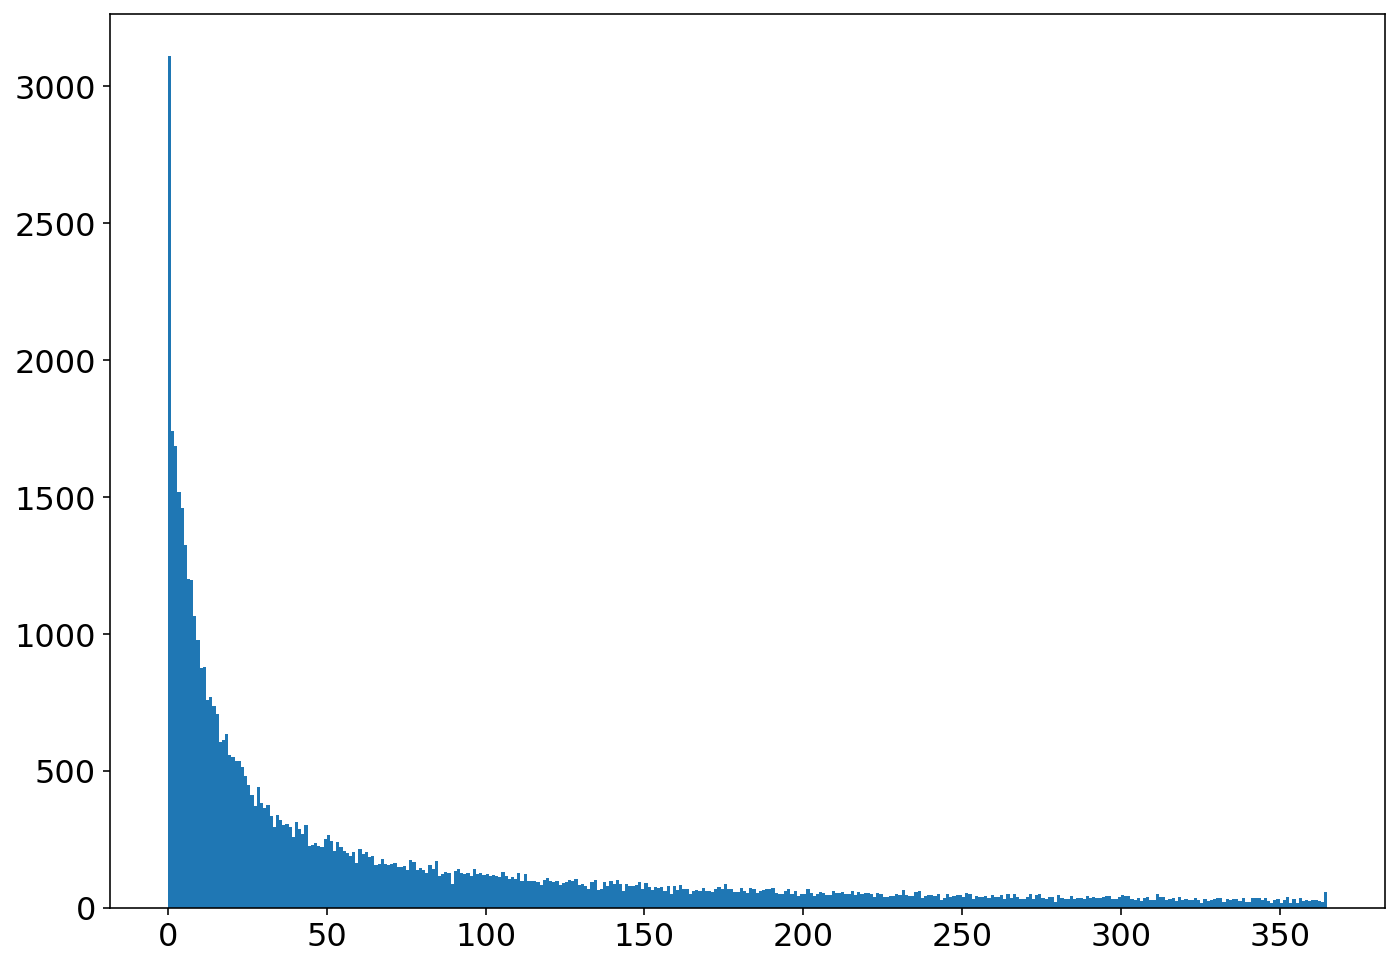

In [361]:

fig, axs = plt.subplots(1, 1, 
                        figsize =(10, 7),  
                        tight_layout = True) 
  
axs.hist(readmission_data, bins = 365) 

### Save the dataset

In [362]:
# Convert the target variables (ip post) to binary
data['svc_AOA_ip_7days_postdc_bi'] = data['svc_AOA_ip_7days_postdc']
data['svc_AOA_ip_30days_postdc_bi'] = data['svc_AOA_ip_30days_postdc']
data['svc_AOA_ip_60days_postdc_bi'] = data['svc_AOA_ip_60days_postdc']
data['svc_AOA_ip_90days_postdc_bi'] = data['svc_AOA_ip_90days_postdc']


bi_cols = ['svc_AOA_ip_7days_postdc_bi', 'svc_AOA_ip_30days_postdc_bi', 'svc_AOA_ip_60days_postdc_bi', 'svc_AOA_ip_90days_postdc_bi']
       
for i in bi_cols:
    data.loc[data[i] > 0, i] = 1

Class 0: 64469
Class 1: 40451
Proportion: 1.59 : 1


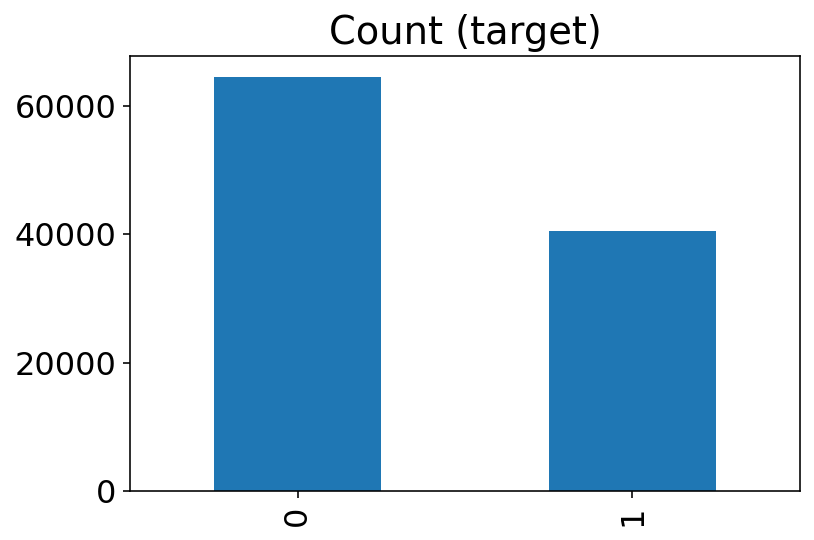

In [363]:
# 90-day readmission data distribution
target_count=data['svc_AOA_ip_90days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [371]:
dist = data[['client_id','svc_AOA_ip_90days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_90days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_AOA_ip_90days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_90days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    26565
1    11707
Name: svc_AOA_ip_90days_postdc_bi, dtype: int64
0    69.411058
1    30.588942
Name: svc_AOA_ip_90days_postdc_bi, dtype: float64


Class 0: 69024
Class 1: 35896
Proportion: 1.92 : 1


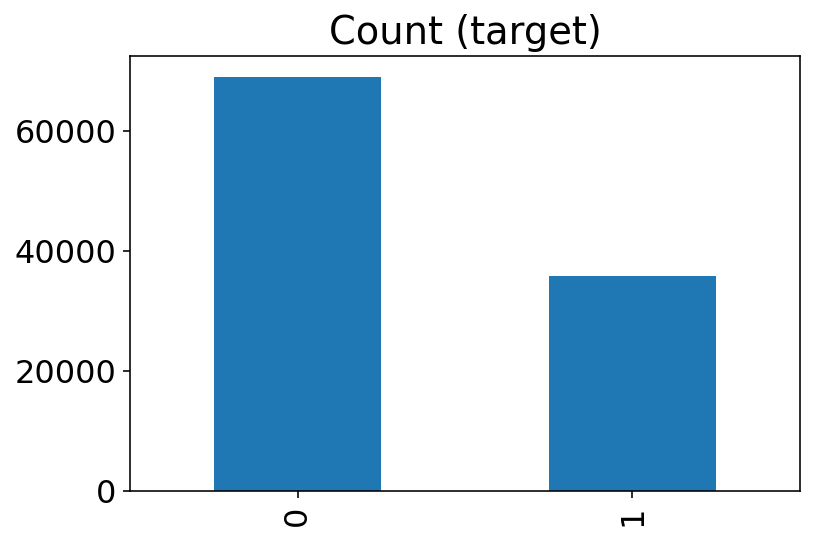

In [372]:
# 60-day readmission data distribution
target_count=data['svc_AOA_ip_60days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [373]:
dist = data[['client_id','svc_AOA_ip_60days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_60days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_AOA_ip_60days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_60days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    27282
1    10990
Name: svc_AOA_ip_60days_postdc_bi, dtype: int64
0    71.28449
1    28.71551
Name: svc_AOA_ip_60days_postdc_bi, dtype: float64


Class 0: 76752
Class 1: 28168
Proportion: 2.72 : 1


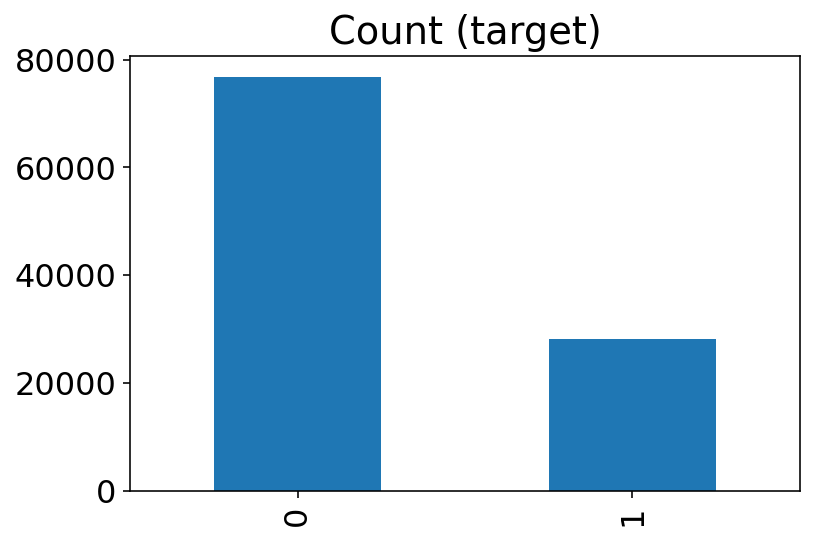

In [365]:
# 30-day readmission data distribution
target_count=data['svc_AOA_ip_30days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [374]:
dist = data[['client_id','svc_AOA_ip_30days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_30days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_AOA_ip_30days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_30days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    28572
1     9700
Name: svc_AOA_ip_30days_postdc_bi, dtype: int64
0    74.6551
1    25.3449
Name: svc_AOA_ip_30days_postdc_bi, dtype: float64


Class 0: 90750
Class 1: 14170
Proportion: 6.4 : 1


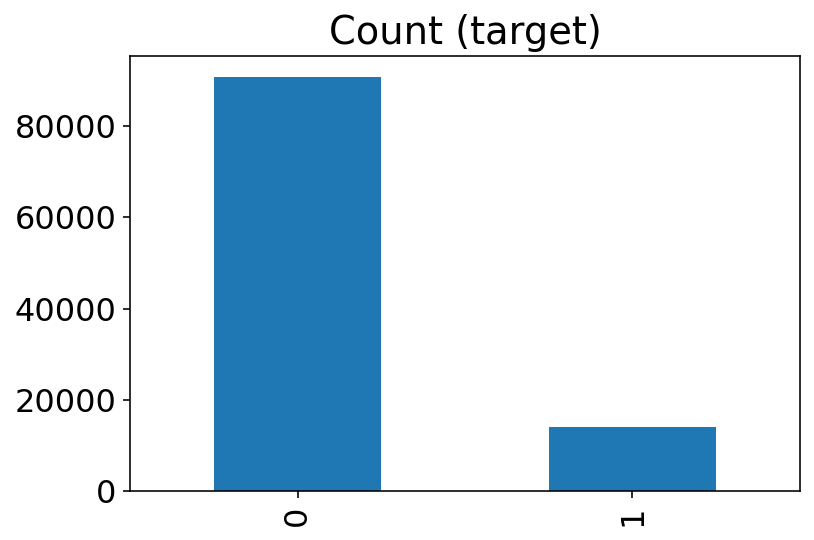

In [366]:
# 7-day readmission data distribution
target_count=data['svc_AOA_ip_7days_postdc_bi'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

In [375]:
dist = data[['client_id','svc_AOA_ip_7days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_7days_postdc_bi.value_counts()
dist_perc = data[['client_id','svc_AOA_ip_7days_postdc_bi']].groupby('client_id').max().svc_AOA_ip_7days_postdc_bi.value_counts(normalize=True) * 100
print(dist)
print(dist_perc)

0    31417
1     6855
Name: svc_AOA_ip_7days_postdc_bi, dtype: int64
0    82.088733
1    17.911267
Name: svc_AOA_ip_7days_postdc_bi, dtype: float64


In [367]:
data.to_csv (r'paths_clean_AOA_Data.csv', index = False, header=True)

In [368]:
data.head()

,id,client_id,case_number,assign_id,new,new_3,as_recnum,as_date_opened,as_date_closed,as_date_prev,as_date_next,as_length_IP,as_gap_between_IP,as_pop,as_loc,as_unit,as_subunit,as_name,as_close,svc_pre_all,svc_pre,svc_pre_sub,svc_during,svc_post_sub,svc_post,svc_post_all,svc_op_7days_pre,svc_op_30days_pre,svc_op_60days_pre,svc_op_90days_pre,svc_es_7days_pre,svc_es_30days_pre,svc_es_60days_pre,svc_es_90days_pre,svc_ip_7days_pre,svc_ip_30days_pre,svc_ip_60days_pre,svc_ip_90days_pre,svc_24h_7days_pre,svc_24h_30days_pre,svc_24h_60days_pre,svc_24h_90days_pre,svc_dt_7days_pre,svc_dt_30days_pre,svc_dt_60days_pre,svc_dt_90days_pre,svc_op_7days_postdc,svc_op_30days_postdc,svc_op_60days_postdc,svc_op_90days_postdc,svc_es_7days_postdc,svc_es_30days_postdc,svc_es_60days_postdc,svc_es_90days_postdc,svc_ip_7days_postdc,svc_ip_30days_postdc,svc_ip_60days_postdc,svc_ip_90days_postdc,svc_24h_7days_postdc,svc_24h_30days_postdc,svc_24h_60days_postdc,svc_24h_90days_postdc,svc_dt_7days_postdc,svc_dt_30days_postdc,svc_dt_60days_postdc,svc_dt_90days_postdc,loc_pre_7days_ACT,loc_pre_30days_ACT,loc_pre_60days_ACT,loc_pre_90days_ACT,loc_pre_7days_CM,loc_pre_30days_CM,loc_pre_60days_CM,loc_pre_90days_CM,loc_pre_7days_CMINST,loc_pre_30days_CMINST,loc_pre_60days_CMINST,loc_pre_90days_CMINST,loc_pre_7days_CMSTR,loc_pre_30days_CMSTR,loc_pre_60days_CMSTR,loc_pre_90days_CMSTR,loc_pre_7days_CMTRAN,loc_pre_30days_CMTRAN,loc_pre_60days_CMTRAN,loc_pre_90days_CMTRAN,loc_pre_7days_WRAP,loc_pre_30days_WRAP,loc_pre_60days_WRAP,loc_pre_90days_WRAP,loc_pre_7days_TBS,loc_pre_30days_TBS,loc_pre_60days_TBS,loc_pre_90days_TBS,loc_pre_7days_FFS,loc_pre_30days_FFS,loc_pre_60days_FFS,loc_pre_90days_FFS,loc_pre_7days_OP,loc_pre_30days_OP,loc_pre_60days_OP,loc_pre_90days_OP,loc_pre_7days_OPLIHP,loc_pre_30days_OPLIHP,loc_pre_60days_OPLIHP,loc_pre_90days_OPLIHP,loc_pre_7days_OPR,loc_pre_30days_OPR,loc_pre_60days_OPR,loc_pre_90days_OPR,loc_pre_7days_PREV,loc_pre_30days_PREV,loc_pre_60days_PREV,loc_pre_90days_PREV,loc_pre_7days_CO,loc_pre_30days_CO,loc_pre_60days_CO,loc_pre_90days_CO,loc_pre_7days_CR,loc_pre_30days_CR,loc_pre_60days_CR,loc_pre_90days_CR,loc_pre_7days_CS,loc_pre_30days_CS,loc_pre_60days_CS,loc_pre_90days_CS,loc_pre_7days_ESU,loc_pre_30days_ESU,loc_pre_60days_ESU,loc_pre_90days_ESU,loc_pre_7days_PERT,loc_pre_30days_PERT,loc_pre_60days_PERT,loc_pre_90days_PERT,loc_pre_7days_UO,loc_pre_30days_UO,loc_pre_60days_UO,loc_pre_90days_UO,loc_pre_7days_IP,loc_pre_30days_IP,loc_pre_60days_IP,loc_pre_90days_IP,loc_pre_7days_IPCAPS,loc_pre_30days_IPCAPS,loc_pre_60days_IPCAPS,loc_pre_90days_IPCAPS,loc_pre_7days_IPCNTY,loc_pre_30days_IPCNTY,loc_pre_60days_IPCNTY,loc_pre_90days_IPCNTY,loc_pre_7days_IPFFS,loc_pre_30days_IPFFS,loc_pre_60days_IPFFS,loc_pre_90days_IPFFS,loc_pre_7days_IPLIHP,loc_pre_30days_IPLIHP,loc_pre_60days_IPLIHP,loc_pre_90days_IPLIHP,loc_pre_7days_IPST,loc_pre_30days_IPST,loc_pre_60days_IPST,loc_pre_90days_IPST,loc_pre_7days_JAIL,loc_pre_30days_JAIL,loc_pre_60days_JAIL,loc_pre_90days_JAIL,loc_pre_7days_JFS,loc_pre_30days_JFS,loc_pre_60days_JFS,loc_pre_90days_JFS,loc_pre_7days_EDG,loc_pre_30days_EDG,loc_pre_60days_EDG,loc_pre_90days_EDG,loc_pre_7days_LTC,loc_pre_30days_LTC,loc_pre_60days_LTC,loc_pre_90days_LTC,loc_pre_7days_LTCINST,loc_pre_30days_LTCINST,loc_pre_60days_LTCINST,loc_pre_90days_LTCINST,loc_pre_7days_LTCRES,loc_pre_30days_LTCRES,loc_pre_60days_LTCRES,loc_pre_90days_LTCRES,loc_pre_7days_RES,loc_pre_30days_RES,loc_pre_60days_RES,loc_pre_90days_RES,loc_pre_7days_BHC,loc_pre_30days_BHC,loc_pre_60days_BHC,loc_pre_90days_BHC,loc_pre_7days_DTC,loc_pre_30days_DTC,loc_pre_60days_DTC,loc_pre_90days_DTC,loc_pre_7days_DTCTF,loc_pre_30days_DTCTF,loc_pre_60days_DTCTF,loc_pre_90days_DTCTF,loc_pre_7days_DTR,loc_pre_30days_DTR,loc_pre_60days_DTR,loc_pre_90days_DTR,loc_pre_7days_STRTP,loc_pre_30days_STRTP,loc_pre_60days_STRTP,loc_pre_90days_STRTP,loc_post_7days_ACT,loc_post_30days_ACT,loc_post_60days_ACT,loc_post_90days_ACT,loc_post_7days_CM,loc_post_30days_CM,loc_post_60

## Recycle codes

In [ ]:

'''
# Convert 7/30/60/90 op, es, ip to binary
bi_cols = ['svc_AOA_op_7days_pre', 'svc_AOA_op_30days_pre', 'svc_AOA_op_60days_pre', 'svc_AOA_op_90days_pre',
           'svc_AOA_es_7days_pre', 'svc_AOA_es_30days_pre', 'svc_AOA_es_60days_pre', 'svc_AOA_es_90days_pre', 
           'svc_AOA_fs_7days_pre', 'svc_AOA_fs_30days_pre', 'svc_AOA_fs_60days_pre', 'svc_AOA_fs_90days_pre', 
           'svc_AOA_24h_7days_pre', 'svc_AOA_24h_30days_pre', 'svc_AOA_24h_60days_pre', 'svc_AOA_24h_90days_pre', 
           'svc_AOA_ip_7days_pre', 'svc_AOA_ip_30days_pre', 'svc_AOA_ip_60days_pre', 'svc_AOA_ip_90days_pre',
           'svc_AOA_op_7days_postdc', 'svc_AOA_op_30days_postdc', 'svc_AOA_op_60days_postdc', 'svc_AOA_op_90days_postdc',
           'svc_AOA_es_7days_postdc', 'svc_AOA_es_30days_postdc', 'svc_AOA_es_60days_postdc', 'svc_AOA_es_90days_postdc', 
           'svc_AOA_fs_7days_postdc', 'svc_AOA_fs_30days_postdc', 'svc_AOA_fs_60days_postdc', 'svc_AOA_fs_90days_postdc', 
           'svc_AOA_24h_7days_postdc', 'svc_AOA_24h_30days_postdc', 'svc_AOA_24h_60days_postdc', 'svc_AOA_24h_90days_postdc', 
           'svc_AOA_ip_7days_postdc', 'svc_AOA_ip_30days_postdc', 'svc_AOA_ip_60days_postdc', 'svc_AOA_ip_90days_postdc']
       
for i in bi_cols:
    data.loc[data[i] > 0, i] = 1
'''

In [ ]:
'''
# Recode certian variables
# recode gender
data['gender'] = data['gender'].replace(['Other/Unknwon','Another Gender Identity','Transgender','Decline to state','Questioning/Unsure','Genderqueer'],'Other/Unknown')

# recode dx
data['dx_group'] = data['dx_group'].replace(['Excluded','Invalid'],'Excluded/Invalid')

# recode language
data['lang'] = data['lang'].replace(['Other Asian','Vietnamese', 'Tagalog'],'Asian languages')
data['lang'] = data['lang'].replace(['Arabic','Farsi', 'Other Middle Eastern'],'Middle Eastern languages')

# recode insurance type
data['insurance'] = data['insurance'].replace(['Medi-Cal + Medicare','Medi-Cal Only', 'Medicare Only'],'Medi-Cal')

# recode sexual orientation
data['sexorient'] = data['sexorient'].replace(['Bisexual','Gay Male', 'Other', 'Lesbian', 'Questioning', 'Transgender'],'LGBTQ+')
data['sexorient'] = data['sexorient'].replace(['Decline to State'],'Missing')

# recode employment status
data['emp'] = data['emp'].replace(['Not Seeking Work','Seeking Work'],'Unemployed')
data['emp'] = data['emp'].replace(['Other','Unknown'],'Other/Unknown')

# recode living situation
data['liv'] = data['liv'].replace(['N'],'Other/Unknown')
'''

In [ ]:
'''
# Substract one from all IP pre loc
data['loc_pre_90days_IP'] = data['loc_pre_90days_IP'] - 1
data['loc_pre_90days_IPCNTY'] = data['loc_pre_90days_IPCNTY'] - 1
data['loc_pre_90days_IPFFS'] = data['loc_pre_90days_IPFFS'] - 1
data['loc_pre_90days_IPST'] = data['loc_pre_90days_IPST'] - 1
data['loc_pre_90days_IPCAPS'] = data['loc_pre_90days_IPCAPS'] - 1


data['loc_pre_90days_IP'] = data['loc_pre_90days_IP'].clip(lower=0)
data['loc_pre_90days_IPCNTY'] = data['loc_pre_90days_IPCNTY'].clip(lower=0)
data['loc_pre_90days_IPFFS'] = data['loc_pre_90days_IPFFS'].clip(lower=0)
data['loc_pre_90days_IPST'] = data['loc_pre_90days_IPST'].clip(lower=0)
data['loc_pre_90days_IPCAPS'] = data['loc_pre_90days_IPCAPS'].clip(lower=0)

data['svc_AOA_ip_90days_pre'] = data['loc_pre_90days_IP'] + data['loc_pre_90days_IPCNTY'] + data['loc_pre_90days_IPFFS'] + data['loc_pre_90days_IPST'] 
'''

In [ ]:
# Calculate IP length
#data['as_length_IP'] =  (data.as_date_closed - data.as_date_opened)
#data['as_length_IP'] = data['as_length_IP'] / np.timedelta64(1, 'D')
#data['as_length_IP'] = data.IP_length.clip(lower=0)

# Calculate the gap between the current IP to the next IP
#data['IP_gap_next_IP'] =  (data.as_date_next - data.as_date_closed)
#data['IP_gap_next_IP'] = data['IP_gap_next_IP'] / np.timedelta64(1, 'D')


In [ ]:
#data['educ'].fillna("Unknown/Not Reported", inplace = True)

In [ ]:
#loc_post_IP_client = data[['client_id','loc_post_IP_total']].groupby('client_id').max()
#print("Number of rehospitalization cases:", np.count_nonzero(data['loc_post_IP_total']))
#print("Number of clients with rehospitalization:", np.count_nonzero(loc_post_IP_client['loc_post_IP_total']))
# number of IP servicecs readmission
#data[['client_id','loc_post_IP_total']].groupby('client_id').max().describe()

In [ ]:
'''
# Number of OP service 
OP_7_pre_dist_perc = data[['client_id','svc_op_7days_pre']].groupby('client_id').max().svc_op_7days_pre.value_counts(normalize=True) * 100
OP_30_pre_dist_perc = data[['client_id','svc_op_30days_pre']].groupby('client_id').max().svc_op_30days_pre.value_counts(normalize=True) * 100
OP_60_pre_dist_perc = data[['client_id','svc_op_60days_pre']].groupby('client_id').max().svc_op_60days_pre.value_counts(normalize=True) * 100
OP_90_pre_dist_perc = data[['client_id','svc_op_90days_pre']].groupby('client_id').max().svc_op_90days_pre.value_counts(normalize=True) * 100

OP_7_post_dist_perc = data[['client_id','svc_op_7days_postdc']].groupby('client_id').max().svc_op_7days_postdc.value_counts(normalize=True) * 100
OP_30_post_dist_perc = data[['client_id','svc_op_30days_postdc']].groupby('client_id').max().svc_op_30days_postdc.value_counts(normalize=True) * 100
OP_60_post_dist_perc = data[['client_id','svc_op_60days_postdc']].groupby('client_id').max().svc_op_60days_postdc.value_counts(normalize=True) * 100
OP_90_post_dist_perc = data[['client_id','svc_op_90days_postdc']].groupby('client_id').max().svc_op_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", OP_7_pre_dist_perc[1])
print("30 days before an IP index:", OP_30_pre_dist_perc[1])
print("60 days before an IP index:", OP_60_pre_dist_perc[1])
print("90 days before an IP index:", OP_90_pre_dist_perc[1])

print("7 days after an IP discharge:", OP_7_post_dist_perc[1])
print("30 days after an IP discharge:", OP_30_post_dist_perc[1])
print("60 days after an IP discharge:", OP_60_post_dist_perc[1])
print("90 days after an IP discharge:", OP_90_post_dist_perc[1])
'''

In [ ]:
'''
# Number of ES service 
ES_7_pre_dist_perc = data[['client_id','svc_es_7days_pre']].groupby('client_id').max().svc_es_7days_pre.value_counts(normalize=True) * 100
ES_30_pre_dist_perc = data[['client_id','svc_es_30days_pre']].groupby('client_id').max().svc_es_30days_pre.value_counts(normalize=True) * 100
ES_60_pre_dist_perc = data[['client_id','svc_es_60days_pre']].groupby('client_id').max().svc_es_60days_pre.value_counts(normalize=True) * 100
ES_90_pre_dist_perc = data[['client_id','svc_es_90days_pre']].groupby('client_id').max().svc_es_90days_pre.value_counts(normalize=True) * 100

ES_7_post_dist_perc = data[['client_id','svc_es_7days_postdc']].groupby('client_id').max().svc_es_7days_postdc.value_counts(normalize=True) * 100
ES_30_post_dist_perc = data[['client_id','svc_es_30days_postdc']].groupby('client_id').max().svc_es_30days_postdc.value_counts(normalize=True) * 100
ES_60_post_dist_perc = data[['client_id','svc_es_60days_postdc']].groupby('client_id').max().svc_es_60days_postdc.value_counts(normalize=True) * 100
ES_90_post_dist_perc = data[['client_id','svc_es_90days_postdc']].groupby('client_id').max().svc_es_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", ES_7_pre_dist_perc[1])
print("30 days before an IP index:", ES_30_pre_dist_perc[1])
print("60 days before an IP index:", ES_30_pre_dist_perc[1])
print("90 days before an IP index:", ES_90_pre_dist_perc[1])

print("7 days after an IP discharge:", ES_7_post_dist_perc[1])
print("30 days after an IP discharge:", ES_30_post_dist_perc[1])
print("60 days after an IP discharge:", ES_60_post_dist_perc[1])
print("90 days after an IP discharge:", ES_90_post_dist_perc[1])
'''

In [ ]:
'''
# Number of IP service 
IP_7_pre_dist_perc = data[['client_id','svc_ip_7days_pre']].groupby('client_id').max().svc_ip_7days_pre.value_counts(normalize=True) * 100
IP_30_pre_dist_perc = data[['client_id','svc_ip_30days_pre']].groupby('client_id').max().svc_ip_30days_pre.value_counts(normalize=True) * 100
IP_60_pre_dist_perc = data[['client_id','svc_ip_60days_pre']].groupby('client_id').max().svc_ip_60days_pre.value_counts(normalize=True) * 100
IP_90_pre_dist_perc = data[['client_id','svc_ip_90days_pre']].groupby('client_id').max().svc_ip_90days_pre.value_counts(normalize=True) * 100

IP_7_post_dist_perc = data[['client_id','svc_ip_7days_postdc']].groupby('client_id').max().svc_ip_7days_postdc.value_counts(normalize=True) * 100
IP_30_post_dist_perc = data[['client_id','svc_ip_30days_postdc']].groupby('client_id').max().svc_ip_30days_postdc.value_counts(normalize=True) * 100
IP_60_post_dist_perc = data[['client_id','svc_ip_60days_postdc']].groupby('client_id').max().svc_ip_60days_postdc.value_counts(normalize=True) * 100
IP_90_post_dist_perc = data[['client_id','svc_ip_90days_postdc']].groupby('client_id').max().svc_ip_90days_postdc.value_counts(normalize=True) * 100

print("7 days before an IP index:", IP_7_pre_dist_perc[1])
print("30 days before an IP index:", IP_30_pre_dist_perc[1])
print("60 days before an IP index:", IP_60_pre_dist_perc[1])
print("90 days before an IP index:", IP_90_pre_dist_perc[1])

print("7 days after an IP discharge:", IP_7_post_dist_perc[1])
print("30 days after an IP discharge:", IP_30_post_dist_perc[1])
print("60 days after an IP discharge:", IP_60_post_dist_perc[1])
print("90 days after an IP discharge:", IP_90_post_dist_perc[1])
'''

In [ ]:
#df_loc = data.iloc[:, 43:183]
#pd.set_option('display.max_columns', 140)
#df_loc.describe(include = 'all')

In [ ]:
# Excluding cases that have more than one year in IP
#data = data.query('as_length_IP <= 365') 

In [ ]:
#data.as_gap_between_IP = data.as_date_next - data.as_date_closed
#data['as_gap_between_IP']=data['as_gap_between_IP']/np.timedelta64(1,'D')
#data['as_gap_between_IP'] = data['as_gap_between_IP'].fillna(value=0)

In [ ]:
#data.drop('fical_year',axis=1, inplace=True)


In [ ]:
'''
# Convert values in new and new_3 (redefine them as any previous assignment and any previous assignment within 3 years)
data.new[data.new == 0] = -1
data.new[data.new == 1] = 0
data.new[data.new == -1] = 1

data.new_3[data.new_3 == 0] = -1
data.new_3[data.new_3 == 1] = 0
data.new_3[data.new_3 == -1] = 1
'''

In [ ]:
'''
# Create the target column and dataset
data_90 = data
data_90['output'] = data_90['svc_AOA_ip_90days_postdc_bi']
data_60 = data
data_60['output'] = data_60['svc_AOA_ip_60days_postdc_bi']
data_30 = data
data_30['output'] = data_30['svc_AOA_ip_30days_postdc_bi']
data_7 = data
data_7['output'] = data_7['svc_AOA_ip_7days_postdc_bi']

data_30.to_csv (r'paths_clean_30.csv', index = False, header=True)
data_90.to_csv (r'paths_clean_90.csv', index = False, header=True)
data_60.to_csv (r'paths_clean_60.csv', index = False, header=True)
data_7.to_csv (r'paths_clean_7.csv', index = False, header=True)
'''

In [ ]:
'''
# Select only cases that have been rehospitalized within a year
data = data.query('as_gap_between_IP <= 365') 

'''